# Prosper Loan Default Prediction

## Group 8

_Jahnavi Kalyani_

_Sakshi Mishra_

_Yash Raval_

***

## Data Preparation

**Importing libraries we will be using**

In [36]:
import pandas as pd
import numpy as np
import math

**Importing the data onto a pandas dataframe**

In [37]:
data = pd.read_csv('ProsperLoanData.csv')

In [38]:
data.shape

(113937, 81)

In [39]:
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### Data Cleaning

In [40]:
# Keeping a copy of the original dataframe
orig_data = data

In [41]:
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [42]:
# Removing ListingKey, ListingNumber as they are meaningless for our analysis as they are unique to each person.
data = data.drop(['ListingKey', 'ListingNumber'], axis=1)
data.head()

,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


**Target Variable**

The attribute **_'LoanStatus'_** is our target variable. 

In [43]:
data['LoanStatus'].value_counts(dropna=False) # Target

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

We are modifying the target to take values 0, 1. We are considering 'ChargedOff', 'Defaulted' as 1 and rest as 0.

In [44]:
unique_target = data['LoanStatus'].unique()

for i in unique_target:
    if i in ['Chargedoff', 'Defaulted']:
        data['LoanStatus'] = data['LoanStatus'].replace(i, 1)
    else:
        data['LoanStatus'] = data['LoanStatus'].replace(i, 0)

In [45]:
unique_target = orig_data['LoanStatus'].unique()

for i in unique_target:
    if i in ['Chargedoff', 'Defaulted']:
        orig_data['LoanStatus'] = orig_data['LoanStatus'].replace(i, 1)
    else:
        orig_data['LoanStatus'] = orig_data['LoanStatus'].replace(i, 0)

In [46]:
data['LoanStatus'].head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    1
16    0
17    1
18    0
19    0
Name: LoanStatus, dtype: int64

Cleaning up the rest of the atttributes :-

In [47]:
for col in data:
    number_nan = data[col].isnull().sum()
    number_distinct = data[col].nunique(dropna=True)
    print (col, number_nan, number_distinct)

ListingCreationDate 0 113064
CreditGrade 84984 8
Term 0 3
LoanStatus 0 2
ClosedDate 58848 2802
BorrowerAPR 25 6677
BorrowerRate 0 2294
LenderYield 0 2283
EstimatedEffectiveYield 29084 1582
EstimatedLoss 29084 120
EstimatedReturn 29084 1476
ProsperRating (numeric) 29084 7
ProsperRating (Alpha) 29084 7
ProsperScore 29084 11
ListingCategory (numeric) 0 21
BorrowerState 5515 51
Occupation 3588 67
EmploymentStatus 2255 8
EmploymentStatusDuration 7625 605
IsBorrowerHomeowner 0 2
CurrentlyInGroup 0 2
GroupKey 100596 706
DateCreditPulled 0 112992
CreditScoreRangeLower 591 26
CreditScoreRangeUpper 591 26
FirstRecordedCreditLine 697 11585
CurrentCreditLines 7604 54
OpenCreditLines 7604 52
TotalCreditLinespast7years 697 118
OpenRevolvingAccounts 0 48
OpenRevolvingMonthlyPayment 0 2834
InquiriesLast6Months 697 50
TotalInquiries 1159 102
CurrentDelinquencies 697 47
AmountDelinquent 7622 7059
DelinquenciesLast7Years 990 100
PublicRecordsLast10Years 697 25
PublicRecordsLast12Months 7604 7
RevolvingCr

In [48]:
# Creating Month, Year Combinations to form buckets for dates

listingcreationdate = []
for i in data['ListingCreationDate']:
    date = i.split()[0].split('-')
    month = str(date[1])+'-'+str(date[0])
    listingcreationdate.append(month)
data = data.drop(['ListingCreationDate'], axis=1)
dateseries = pd.Series(listingcreationdate)
data['ListingCreationDate'] = dateseries.values

In [49]:
data['ListingCreationDate'].nunique(dropna=True)

95

In [50]:
# Credit grade has more than 84000 Nulls. Seems like we should get rid of it! But if we want we can still check its IG 
#to be sure.

data['CreditGrade'].value_counts(dropna=False) # Check if the nulls are informative? Or other values are? If not get rid of it

NaN    84984
C       5649
D       5153
B       4389
AA      3509
HR      3508
A       3315
E       3289
NC       141
Name: CreditGrade, dtype: int64

In [51]:
# The Description of the features says that the data for this has been filled only for entries before 2009.

data = data.drop('CreditGrade', axis = 1)

In [52]:
data['Term'].value_counts(dropna=False) # Length of loan in months

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [53]:
# ClosedDate - NAN values are probably ongoing ones. 
# Replaced it with NA to see if missingness can be predictive

data['ClosedDate'].fillna('NA', inplace=True)

closeddate = []
for i in data['ClosedDate']:
    if i == 'NA':
        closeddate.append(i)
    else:
        date = i.split()[0].split('-')
        month = str(date[1])+'-'+str(date[0])
        closeddate.append(month)
data = data.drop(['ClosedDate'], axis=1)
dateseries = pd.Series(closeddate)
data['ClosedDate'] = dateseries.values

In [54]:
data['ClosedDate'].nunique(dropna=True)

102

In [55]:
# Filling '-9999' for Nulls

data['BorrowerAPR'].fillna(-9999.0, inplace=True)
data['EstimatedEffectiveYield'].fillna(-9999.0, inplace=True)
data['EstimatedLoss'].fillna(-9999.0, inplace=True)
data['EstimatedReturn'].fillna(-9999.0, inplace=True)

In [56]:
data['ProsperRating (numeric)'].value_counts(dropna=False)

NaN     29084
 4.0    18345
 5.0    15581
 6.0    14551
 3.0    14274
 2.0     9795
 1.0     6935
 7.0     5372
Name: ProsperRating (numeric), dtype: int64

In [57]:
data['ProsperRating (Alpha)'].value_counts(dropna=False)

NaN    29084
C      18345
B      15581
A      14551
D      14274
E       9795
HR      6935
AA      5372
Name: ProsperRating (Alpha), dtype: int64

In [58]:
# Check if Numeric and Alpha values are properly mapped. 

a = data['ProsperRating (Alpha)'].values.tolist()
n = data['ProsperRating (numeric)'].values.tolist()
map_an = {'AA': 7.0, 'HR': 1.0, 'E':2.0, 'D':3.0, 'A':6.0, 'B':5.0, 'C':4.0}
count_non_nan = 0

for i in range(0, len(n)):
    if a[i] in map_an.keys():
        if n[i] == map_an[a[i]]:
            count_non_nan += 1
        else:
            print (i, a[i], n[i])
print (len(n)-count_non_nan)

29084


In [62]:
#Since Alpha and Numeric are properly mapped, we can drop Alpha and keep Numeric!

data = data.drop('ProsperRating (Alpha)', axis = 1)

In [60]:
data['ProsperScore'].value_counts(dropna=False)

NaN      29084
 4.0     12595
 6.0     12278
 8.0     12053
 7.0     10597
 5.0      9813
 3.0      7642
 9.0      6911
 2.0      5766
 10.0     4750
 11.0     1456
 1.0       992
Name: ProsperScore, dtype: int64

In [61]:
s = data['ProsperScore'].values.tolist()

In [63]:
# We want to check how this corrrelates to rating - to see if they give meaningful ranges

map_s = {1.0: [], 2.0: [], 3.0: [], 4.0: [], 5.0: [], 6.0: [], 7.0: [], 8.0: [], 9.0: [], 10.0: [], 11.0: []}
count_nan = 0

for i in range(0, len(n)):
    if s[i] in map_s.keys():
        if n[i] not in map_s[s[i]]:
            map_s[s[i]].append(n[i])
    else:
        count_nan += 1
print (map_s, count_nan)

{1.0: [2.0, 1.0, 3.0, 4.0, 6.0, 5.0], 2.0: [2.0, 1.0, 3.0, 4.0, 5.0, 6.0], 3.0: [2.0, 3.0, 1.0, 4.0, 5.0, 6.0, 7.0], 4.0: [3.0, 4.0, 5.0, 2.0, 1.0, 6.0, 7.0], 5.0: [1.0, 3.0, 4.0, 5.0, 2.0, 6.0, 7.0], 6.0: [6.0, 3.0, 4.0, 5.0, 2.0, 1.0, 7.0], 7.0: [6.0, 4.0, 5.0, 3.0, 7.0, 2.0, 1.0], 8.0: [6.0, 3.0, 5.0, 7.0, 4.0, 2.0, 1.0], 9.0: [6.0, 7.0, 5.0, 4.0, 3.0, 2.0, 1.0], 10.0: [5.0, 7.0, 6.0, 4.0, 3.0, 2.0, 1.0], 11.0: [7.0, 6.0, 5.0, 4.0]} 29084


In [64]:
# Doesn't seem to be giving any meaningful range. We let this be!
# Also, '-9999.0' is not a rating its NULL ->

data['ProsperScore'].fillna(-9999.0, inplace=True)

In [65]:
# Filling NA for ProsperRating (Alpha)

data['ProsperRating (numeric)'].fillna(-9999.0, inplace=True)
data['ProsperRating (numeric)'].value_counts()

-9999.0    29084
 4.0       18345
 5.0       15581
 6.0       14551
 3.0       14274
 2.0        9795
 1.0        6935
 7.0        5372
Name: ProsperRating (numeric), dtype: int64

In [66]:
data['ListingCategory (numeric)'].value_counts(dropna=False) # Type of Loan

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [67]:
#BorrowerState - 51 States

data['BorrowerState'].value_counts(dropna=False)[:20]

CA     14717
TX      6842
NY      6729
FL      6720
IL      5921
NaN     5515
GA      5008
OH      4197
MI      3593
VA      3278
NJ      3097
NC      3084
WA      3048
PA      2972
MD      2821
MO      2615
MN      2318
MA      2242
CO      2210
IN      2078
Name: BorrowerState, dtype: int64

In [68]:
data['BorrowerState'].fillna('NA', inplace=True)

In [69]:
# We might want to club different types of say, students or salespersons together to see if they are more informative?

data['Occupation'].value_counts(dropna=False)[:20]

Other                                28617
Professional                         13628
Computer Programmer                   4478
Executive                             4311
Teacher                               3759
Administrative Assistant              3688
Analyst                               3602
NaN                                   3588
Sales - Commission                    3446
Accountant/CPA                        3233
Clerical                              3164
Sales - Retail                        2797
Skilled Labor                         2746
Retail Management                     2602
Nurse (RN)                            2489
Construction                          1790
Truck Driver                          1675
Laborer                               1595
Police Officer/Correction Officer     1578
Civil Service                         1457
Name: Occupation, dtype: int64

In [70]:
data['EmploymentStatusDuration'].fillna(-9999.0, inplace=True)
data['CreditScoreRangeLower'].fillna(-9999.0, inplace=True)
data['CreditScoreRangeUpper'].fillna(-9999.0, inplace=True)
data['CurrentCreditLines'].fillna(-9999, inplace=True)
data['OpenCreditLines'].fillna(-9999, inplace=True)
data['TotalCreditLinespast7years'].fillna(-9999, inplace=True)
data['LoanFirstDefaultedCycleNumber'].fillna(-9999, inplace=True)

In [71]:
data['Occupation'].fillna('NA', inplace=True)

In [72]:
# We might want to see IG and decide if we want to club similar values

data['EmploymentStatus'].value_counts(dropna=False)

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
NaN               2255
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [73]:
# Clubbing NaN with Not available

data['EmploymentStatus'].fillna('Not available', inplace=True)

In [74]:
data['EmploymentStatus'].value_counts(dropna=False)

Employed         67322
Full-time        26355
Not available     7602
Self-employed     6134
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [75]:
#EmploymentStatusDuration - can make ranges but for now we are keeping it as continuous!

In [76]:
data['IsBorrowerHomeowner'].value_counts(dropna=False)

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

In [77]:
data['CurrentlyInGroup'].value_counts(dropna=False)
# False - not in group 

False    101218
True      12719
Name: CurrentlyInGroup, dtype: int64

In [78]:
# Typecasting to String as some values are not correctly formatted

data['GroupKey'].fillna('NA', inplace=True)
data['GroupKey'] = data['GroupKey'].astype('str')

In [79]:
# GroupKey has 100596 Nulls and 706 unique - It is basically the non-binary version of the above column. We can drop it.
data = data.drop('GroupKey', axis = 1)

In [80]:
creditdate = []
for i in data['DateCreditPulled']:
    date = i.split()[0].split('-')
    month = str(date[1])+'-'+str(date[0])
    creditdate.append(month)
data = data.drop(['DateCreditPulled'], axis=1)
dateseries = pd.Series(creditdate)
data['DateCreditPulled'] = dateseries.values

In [81]:
data['DateCreditPulled'].nunique()

95

In [82]:
data['FirstRecordedCreditLine'].fillna('NA', inplace=True)
creditlinedate = []
for i in data['FirstRecordedCreditLine']:
    if i == 'NA':
        creditlinedate.append(i)
    else:
        date = i.split()[0].split('-')
        month = str(date[1])+'-'+str(date[0])
        creditlinedate.append(month)

In [83]:
data = data.drop(['FirstRecordedCreditLine'], axis=1)
dateseries = pd.Series(creditlinedate)
data['FirstRecordedCreditLine'] = dateseries.values

In [84]:
# AmountDelinquent, Score - maybe have ranges? make it categorical? (Same for above)

In [85]:
# Unique and non informative!
data = data.drop(['MemberKey', 'LoanKey', 'LoanNumber'],axis=1)

In [86]:
data['TotalProsperLoans'].value_counts(dropna=False)

NaN     91852
 1.0    15538
 2.0     4540
 3.0     1447
 4.0      417
 5.0      104
 6.0       29
 7.0        8
 0.0        1
 8.0        1
Name: TotalProsperLoans, dtype: int64

In [87]:
# Replace Nulls with -9999.0

data['TotalProsperLoans'].fillna(-9999.0, inplace=True)

In [88]:
data['TotalProsperLoans'].value_counts(dropna=False)

-9999.0    91852
 1.0       15538
 2.0        4540
 3.0        1447
 4.0         417
 5.0         104
 6.0          29
 7.0           8
 0.0           1
 8.0           1
Name: TotalProsperLoans, dtype: int64

In [89]:
# Filling with -1.0 for nulls

data['ProsperPaymentsLessThanOneMonthLate'].fillna(-9999.0, inplace=True)
data['ProsperPaymentsOneMonthPlusLate'].fillna(-9999.0, inplace=True)
data['InquiriesLast6Months'].fillna(-9999.0, inplace=True)
data['TotalInquiries'].fillna(-9999.0, inplace=True)
data['CurrentDelinquencies'].fillna(-9999.0, inplace=True)
data['AmountDelinquent'].fillna(-9999.0, inplace=True)
data['DelinquenciesLast7Years'].fillna(-9999.0, inplace=True)
data['PublicRecordsLast10Years'].fillna(-9999.0, inplace=True)
data['PublicRecordsLast12Months'].fillna(-9999.0, inplace=True)
data['RevolvingCreditBalance'].fillna(-9999.0, inplace=True)
data['BankcardUtilization'].fillna(-9999.0, inplace=True)
data['AvailableBankcardCredit'].fillna(-9999.0, inplace=True)
data['TotalTrades'].fillna(-9999.0, inplace=True)
data['TradesNeverDelinquent (percentage)'].fillna(-9999.0, inplace=True)
data['TradesOpenedLast6Months'].fillna(-9999.0, inplace=True)
data['TotalProsperPaymentsBilled'].fillna(-9999.0, inplace=True)
data['OnTimeProsperPayments'].fillna(-9999.0, inplace=True)
data['ProsperPrincipalBorrowed'].fillna(-9999.0, inplace=True)
data['ProsperPrincipalOutstanding'].fillna(-9999.0, inplace=True)
data['ScorexChangeAtTimeOfListing'].fillna(-9999.0, inplace=True)
data['DebtToIncomeRatio'].fillna(-9999.0, inplace=True)

In [90]:
# For now
data = data.drop(['TotalProsperLoans'], axis=1)

In [91]:
# Modifying LoanOriginationDate to 'Month-Year' format

origdate = []
for i in data['LoanOriginationDate']:
    date = i.split()[0].split('-')
    month = str(date[1])+'-'+str(date[0])
    origdate.append(month)
data = data.drop(['LoanOriginationDate'], axis=1)
dateseries = pd.Series(origdate)
data['LoanOriginationDate'] = dateseries.values

In [92]:
data['LoanOriginationQuarter'].value_counts(dropna=False) # This is the count for invidual quarter and year values 

Q4 2013    14450
Q1 2014    12172
Q3 2013     9180
Q2 2013     7099
Q3 2012     5632
Q2 2012     5061
Q1 2012     4435
Q4 2012     4425
Q2 2008     4344
Q4 2011     3913
Q1 2013     3616
Q3 2008     3602
Q2 2007     3118
Q3 2011     3093
Q1 2007     3079
Q1 2008     3074
Q3 2007     2671
Q4 2007     2592
Q2 2011     2478
Q4 2006     2403
Q3 2006     1934
Q1 2011     1744
Q4 2010     1600
Q2 2010     1539
Q4 2009     1449
Q3 2010     1270
Q2 2006     1254
Q1 2010     1243
Q3 2009      585
Q4 2008      532
Q1 2006      315
Q4 2005       22
Q2 2009       13
Name: LoanOriginationQuarter, dtype: int64

In [93]:
#Here we are replacing/merging 0$ and Not Employed under the category of Not Employed

data['IncomeRange'] = data['IncomeRange'].replace('$0','Not employed')
data['IncomeRange'].value_counts(dropna=False)

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed       1427
Name: IncomeRange, dtype: int64

In [94]:
data['IncomeVerifiable'].value_counts(dropna=False)

True     105268
False      8669
Name: IncomeVerifiable, dtype: int64

In [95]:
for col in data:
    number_nan = data[col].isnull().sum()
    number_distinct = data[col].nunique(dropna=True)
    if number_nan> 0:
        print (col, number_nan, number_distinct)

### Entropy and Information Gain

The **target** of this dataset is a feature called 'LoanStatus' which we have made **binary** (1 for defaults and 0 for non defaults)

In [131]:
variable_names = list(data)
target_name = 'LoanStatus'
feature_data = []

# Our variables (features) will be stored in one variable called X
for i in range(0, len(data.columns)):
    feature_data.append(variable_names[i])

X = data[feature_data]
X = X.drop('LoanStatus', axis=1)

# Our target will be stored in one variable called Y
Y = data[target_name]

Let's take a look at the data

In [97]:
X.head()

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),...,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCreationDate,ClosedDate,DateCreditPulled,FirstRecordedCreditLine,LoanOriginationDate
0,36,0.16516,0.1580,0.1380,-9999.00000,-9999.0000,-9999.00000,-9999.0,-9999.0,0,...,1.0,0,0,0.0,258,08-2007,08-2009,08-2007,10-2001,09-2007
1,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,2,...,1.0,0,0,0.0,1,02-2014,NA,02-2014,03-1996,03-2014
2,36,0.28269,0.2750,0.2400,-9999.00000,-9999.0000,-9999.00000,-9999.0,-9999.0,0,...,1.0,0,0,0.0,41,01-2007,12-2009,01-2007,07-2002,01-2007
3,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,16,...,1.0,0,0,0.0,158,10-2012,NA,10-2012,02-1983,11-2012
4,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,2,...,1.0,0,0,0.0,20,09-2013,NA,09-2013,02-2004,09-2013


In [98]:
Y.tail()

113932    0
113933    0
113934    0
113935    0
113936    0
Name: LoanStatus, dtype: int64

**Features and splits**

Let's take a look at a few features to see if they are informative. Attributes we want to plot: **'CurrentDelinquencies'**, **'CurrentCreditLines'**, **'EstimatedEffectiveYield'**

Let's plot the possible values of 'CurrentDelinquencies', 'CurrentCreditLines', 'EstimatedEffectiveYield' and color code our target variable, which is 'LoanStatus'.

The horizontal value is the values they take. We can distinguish the red dots meaning people who haven't defaulted and blue dots meaning people who did default. The vertical position here doesn't mean anything.

In [99]:
import matplotlib.patches as patches
import matplotlib.pylab as plt
%matplotlib inline

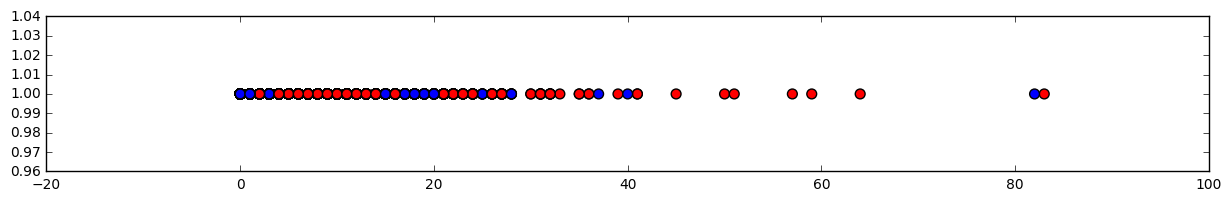

In [100]:
# For CurrentDelinquencies
plt.rcParams['figure.figsize'] = [15.0, 2.0]

color = ["red" if x == 0 else "blue" for x in data['LoanStatus']]
plt.scatter(orig_data['CurrentDelinquencies'], [1] * len(orig_data), c=color, s=50)

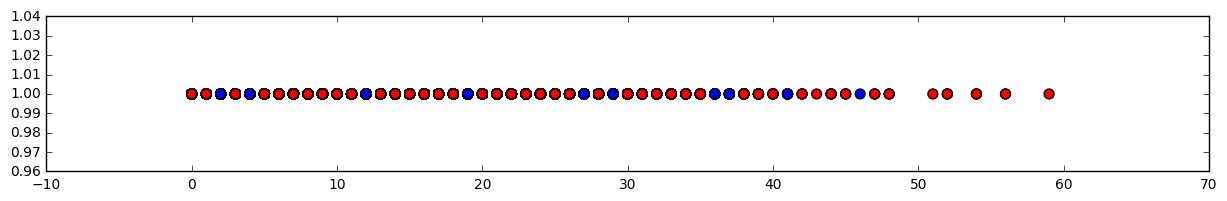

In [101]:
# For CurrentCreditLines
plt.rcParams['figure.figsize'] = [15.0, 2.0]

color = ["red" if x == 0 else "blue" for x in data['LoanStatus']]
plt.scatter(orig_data['CurrentCreditLines'], [1] * len(orig_data), c=color, s=50)

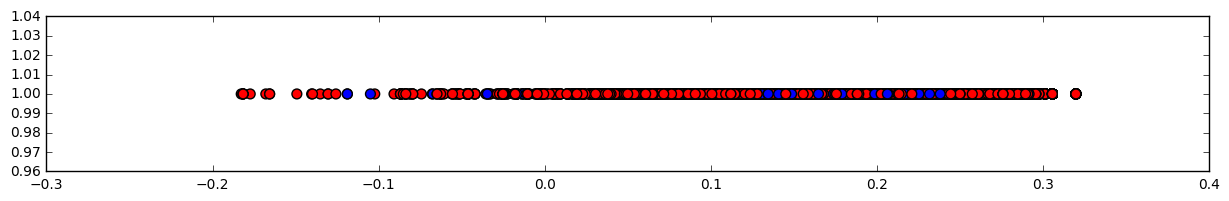

In [102]:
# For EstimatedEffectiveYield
plt.rcParams['figure.figsize'] = [15.0, 2.0]

color = ["red" if x == 0 else "blue" for x in data['LoanStatus']]
plt.scatter(orig_data['EstimatedEffectiveYield'], [1] * len(orig_data), c=color, s=50)

**Defining functions for entropy and information gain**

In [103]:
def entropy_continuous(target):
    '''
        Computes the entropy for a set of instances (that's needed is the values of the target variable)
        Presumes the target values are class indexes -- integers
        Thus, target is an array of integers
    '''
    # Get the number of instances
    n = len(target)
    # Count how frequently each unique target value occurs using the numpy function 
    counts = np.bincount(target).astype(float)
    # Initialize entropy
    entropy = 0
    
    # Otherwise, for each possible value, update entropy; use zero for 0 log 0
    for count in counts:
        if count == 0:
            entropy += 0
        else:
            entropy += math.log(count/n, 2) * count/n
    # Return entropy
    return -1 * entropy


def entropy_categorical(target):
    '''
        Computes the entropy for a binary target variable
    '''
    # Get the number of instances
    n = len(target)
    # Count how frequently each unique target value occurs using the numpy function 
    counts = [0, 0]
    for i in range(n):
        counts[target[i]] += 1.0
    # Initialize entropy
    entropy = 0
    
    # Otherwise, for each possible value, update entropy; use zero for 0 log 0
    for count in counts:
        if count == 0:
            entropy += 0
        else:
            entropy += math.log(count/n, 2) * count/n
    # Return entropy
    return -1 * entropy


def information_gain_continuous(feature, threshold, target):
    '''
    This function takes three things:
    feature - A list of all the values this feature takes on, in some instance order
    threshold - A number at which to threshold a continuous variable
    target - A list of all the target values, in the same order as feature
    '''
    # Using numpy arrays makes this slightly easier
    target = np.array(target)
    feature = np.array(feature)
    # Record if each feature value is above the threshold
    feature = (feature <= threshold)
    # Initialize information gain with the parent entropy
    ig = entropy_continuous(target)
    # For each side of the threshold, update the information gain
    for level, count in zip([0, 1], np.bincount(feature).astype(float)):
        ig -= count/len(feature) * entropy_continuous(target[feature == level])
    # Return information gain
    return ig


def information_gain_categorical(feature, target):
    '''
    This function takes three things:
    feature - A list of all the values this feature takes on, in some instance order
    target - A list of all the target values, in the same order as feature
    '''
    # Converting it to a list
    target = target.values.tolist()
    feature = feature.values.tolist()
    # Initialize information gain with the parent entropy
    ig = entropy_categorical(target)
    # For each category, update the information gain
    category = {}
    target_dict = {}
    counter = 0
    for i in feature:
        if i not in category.keys():
            category[i] = 1
            target_dict[i] = [target[counter]]
        elif i in category.keys():
            category[i] += 1
            target_dict[i].append(target[counter])
        counter += 1
    for k in category.keys():
        ig -= category[k]/len(feature) * entropy_categorical(target_dict[k])
    # Return information gain
    return ig

In [104]:
# 'CurrentDelinquencies' as Continuous

information_gain_continuous(X['CurrentDelinquencies'], 1.00, np.array(Y))

0.021521863794228713

In [105]:
# 'CurrentDelinquencies' as categorical

a = data['CurrentDelinquencies'].values.tolist()
for i in range(len(a)):
    if a[i] <= 1.00:
        a[i] = 1
    else:
        a[i] = 0
x = pd.DataFrame(a, columns=['a'])
information_gain_categorical(x['a'], data['LoanStatus'])

0.021521863794228713

Let's pick thresholds, and split 'CurrentDelinquencies', 'CurrentCreditLines' and 'EstimatedEffectiveYield', and calculate $IG$.

In [106]:
threshold = 1
print ("IG = %.4f with thresholding of %.2f." % (information_gain_continuous(X['CurrentDelinquencies'], threshold, np.array(Y)), threshold))

IG = 0.0215 with thresholding of 1.00.


In [107]:
threshold = 5
print ("IG = %.4f with thresholding of %.2f." % (information_gain_continuous(X['CurrentCreditLines'], threshold, np.array(Y)), threshold))

IG = 0.0216 with thresholding of 5.00.


In [108]:
threshold = 0.1
print ("IG = %.4f with thresholding of %.2f." % (information_gain_continuous(X['EstimatedEffectiveYield'], threshold, np.array(Y)), threshold))

IG = 0.0386 with thresholding of 0.10.


**Picking the best threshold for continuous variables**

In [109]:
def best_threshold(feature):
    maximum_ig = 0
    maximum_threshold = 0
    for threshold in feature.unique():
        ig = information_gain_continuous(feature, threshold, np.array(Y))
        if ig > maximum_ig:
            maximum_ig = ig
            maximum_threshold = threshold
    print (maximum_ig, maximum_threshold)
    return maximum_threshold

Let's now run this for all features and see which of the features are most informative!

In [110]:
features = {}
threshold = {}

In [78]:
for col in X:
    number_distinct = X[col].nunique(dropna=True)
    if number_distinct < 53 or type(X[col][0]).__name__=='str':
        print (col)
        ig = information_gain_categorical(X[col], Y)
        print(ig)
        threshold[col] = 'NA'
        features[col] = ig
    else:
        print (col)
        t = best_threshold(X[col])
        ig = information_gain_continuous(X[col], t, Y)
        threshold[col] = t
        features[col] = ig

CreditGrade
0.09475704703028981
Term
0.01944673221249416
BorrowerAPR
0.0172841199541 0.2356
BorrowerRate
0.0260218277985 0.1984
LenderYield
0.0246975940914 0.1884
EstimatedEffectiveYield
0.0808208382856 -0.0251
EstimatedLoss
0.0805452427261 -9999.0
EstimatedReturn
0.0808718041953 -0.0251
ProsperRating (Alpha)
0.10316811398792514
ProsperScore
0.08792400771285597
ListingCategory (numeric)
0.06183821225284765
BorrowerState
0.012438279860157907
Occupation
0.01058904609813495
EmploymentStatus
0.07353518575692644
EmploymentStatusDuration
0.0202729899447 -9999.0
IsBorrowerHomeowner
0.001669629376502002
CurrentlyInGroup
0.027016882388934127
CreditScoreRangeLower
0.06459077182397356
CreditScoreRangeUpper
0.06459077182397335
CurrentCreditLines
0.0266259961446 3.0
OpenCreditLines
0.0268587249333 2.0
TotalCreditLinespast7years
0.0056276161294 11.0
OpenRevolvingAccounts
0.025704923178597138
OpenRevolvingMonthlyPayment
0.0211456449125 58.0
InquiriesLast6Months
0.04547924736484299
TotalInquiries
0.02

In [81]:
feature_store = list(features.keys())

In [82]:
igs_store = list(features.values())

In [132]:
#feature_store = ['OnTimeProsperPayments', 'RevolvingCreditBalance', 'EstimatedReturn', 'LoanOriginationQuarter', 'CreditGrade', 'LP_NonPrincipalRecoverypayments', 'LoanOriginalAmount', 'ProsperScore', 'LoanCurrentDaysDelinquent', 'Term', 'ProsperRating (numeric)', 'LoanMonthsSinceOrigination', 'TotalInquiries', 'CurrentDelinquencies', 'ProsperPrincipalOutstanding', 'OpenCreditLines', 'CreditScoreRangeUpper', 'EmploymentStatusDuration', 'InvestmentFromFriendsAmount', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'ClosedDate', 'BorrowerRate', 'ScorexChangeAtTimeOfListing', 'Recommendations', 'StatedMonthlyIncome', 'InquiriesLast6Months', 'ProsperPrincipalBorrowed', 'OpenRevolvingMonthlyPayment', 'EmploymentStatus', 'LP_CollectionFees', 'Occupation', 'ListingCategory (numeric)', 'LP_ServiceFees', 'EstimatedEffectiveYield', 'TotalProsperPaymentsBilled', 'LP_GrossPrincipalLoss', 'LenderYield', 'ProsperPaymentsOneMonthPlusLate', 'DateCreditPulled', 'PublicRecordsLast10Years', 'BorrowerState', 'DebtToIncomeRatio', 'LoanOriginationDate', 'ProsperPaymentsLessThanOneMonthLate', 'TotalTrades', 'CurrentlyInGroup', 'PercentFunded', 'LP_CustomerPayments', 'BankcardUtilization', 'AmountDelinquent', 'DelinquenciesLast7Years', 'TotalCreditLinespast7years', 'FirstRecordedCreditLine', 'ListingCreationDate', 'OpenRevolvingAccounts', 'IncomeVerifiable', 'IncomeRange', 'EstimatedLoss', 'BorrowerAPR', 'CurrentCreditLines', 'LoanFirstDefaultedCycleNumber', 'LP_CustomerPrincipalPayments', 'AvailableBankcardCredit', 'Investors', 'MonthlyLoanPayment', 'CreditScoreRangeLower', 'InvestmentFromFriendsCount', 'LP_InterestandFees', 'LP_NetPrincipalLoss', 'PublicRecordsLast12Months', 'IsBorrowerHomeowner']
#igs_store = [0.0030247451811344916, 0.027238201505033768, 0.080871804195309344, 0.1391400616508717, 0.09475704703028981, 0.082171750318029813, 0.015897413875256838, 0.08792400771285597, 0.58724959648352348, 0.01944673221249416, 0.10316811398792514, 0.10524479332051276, 0.029737410990144764, 0.030413586276812808, 0.0021145406254146071, 0.026858724933277456, 0.06459077182397335, 0.020272989944747591, 0.00060995254169937674, 0.030439501802506236, 0.02810050602651419, 0.20786154312886523, 0.026021827798510866, 0.00098095153287880432, 0.002625922734158577, 0.014110848840678647, 0.04547924736484299, 0.0028343810547407644, 0.021145644912548417, 0.07353518575692644, 0.061672265166481652, 0.01058904609813495, 0.06183821225284765, 0.0038575174814945434, 0.080820838285620533, 0.0028875104122976225, 0.59740143959804526, 0.024697594091378283, 0.0022985751936195342, 0.14016277268460758, 0.0054698676930421625, 0.012438279860157907, 0.0032433422728573857, 0.13983937365177487, 0.0029265156153966965, 0.024167957000730281, 0.027016882388934127, 6.4338543700046512e-05, 0.01177824859423543, 0.025237977565811975, 0.020287358367917119, 0.0067208744704846946, 0.0056276161294006449, 0.007119059423160239, 0.13960812510276, 0.025704923178597138, 0.0002991948111144005, 0.03406676725133126, 0.080545242726124011, 0.017284119954069033, 0.02662599614463762, 0.5928334968212374, 0.020329455372360028, 0.032514794534602848, 0.047867114351091755, 0.0087646545914334406, 0.06459077182397356, 0.0006141583527954692, 0.0024768991906715804, 0.57771109322216663, 0.022187824061223133, 0.001669629376502002]

In [133]:
''''
for i in range(len(feature_store)):
    features[feature_store[i]] = igs_store[i]
''''

In [ ]:
'''
for col in X:
    if col not in features_server:
        number_distinct = X[col].nunique(dropna=True)
        if number_distinct < 53 or type(X[col][0]).__name__=='str':
            print (col)
            ig = information_gain_categorical(X[col], Y)
            print(ig)
            features.append(col)
            igs.append(ig)
        else:
            print (col)
            t = best_threshold(X[col])
            ig = information_gain_continuous(X[col], t, Y)
            print(ig)
            features.append(col)
            igs.append(ig)
'''

In [134]:
import operator
sorted_igs = sorted(features.items(), key=operator.itemgetter(1))

feature_list = []
ig_list = []
for i in sorted_igs:
    feature_list.append(i[0])
    ig_list.append(i[1])

**Plotting Information Gains for Most Informative Attributes**

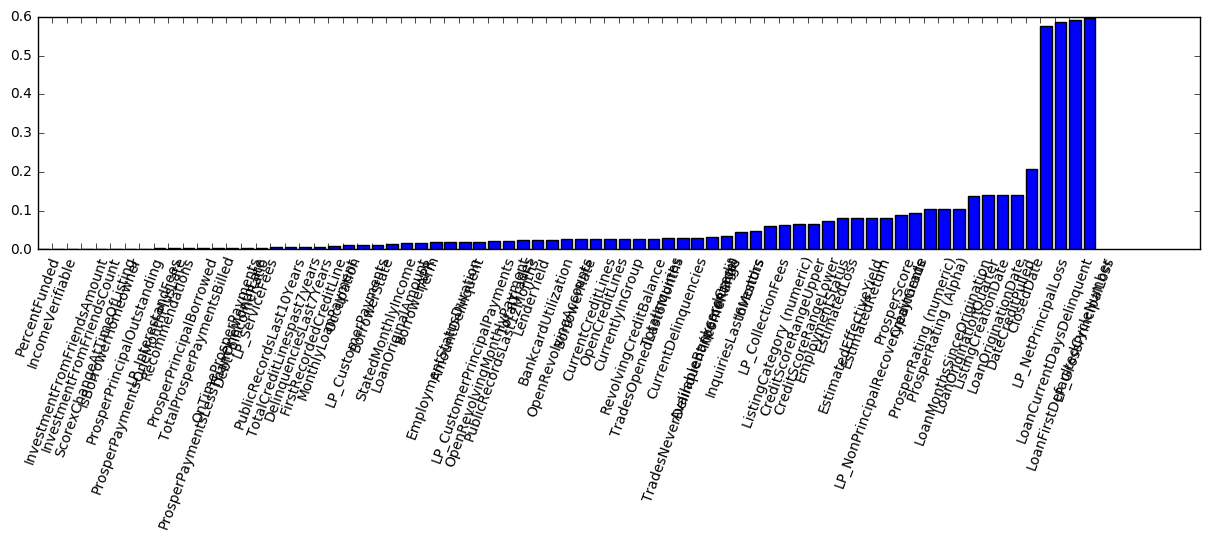

In [135]:
plt.bar(range(len(feature_list)), ig_list)
plt.xticks(range(len(feature_list)), feature_list, rotation=70)
plt.show()

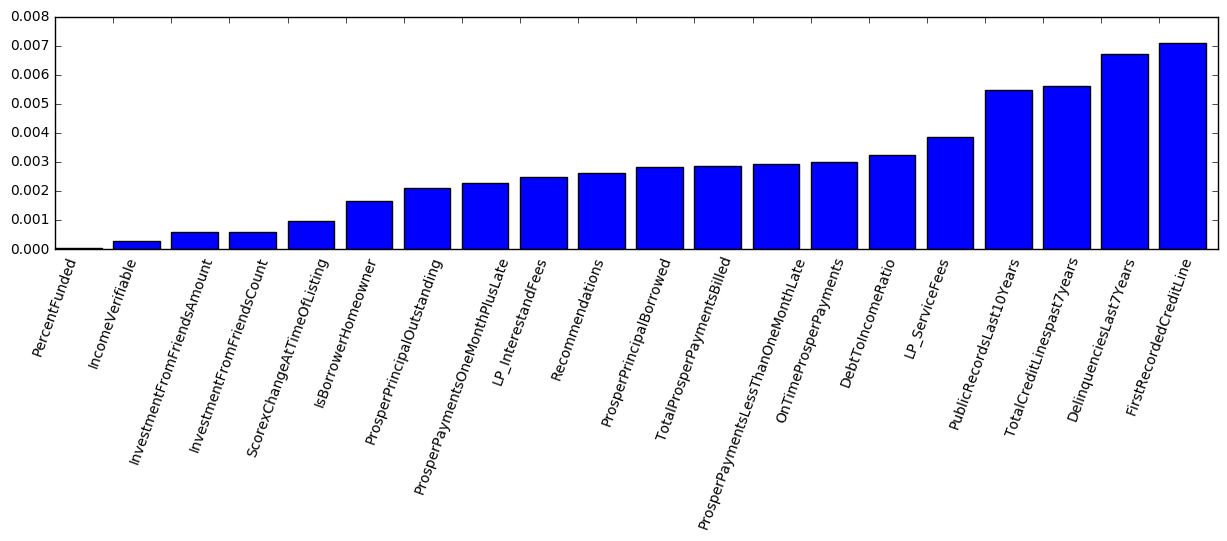

In [136]:
plt.bar(range(len(feature_list[:20])), ig_list[:20])
plt.xticks(range(len(feature_list[:20])), feature_list[:20], rotation=70)
plt.show()

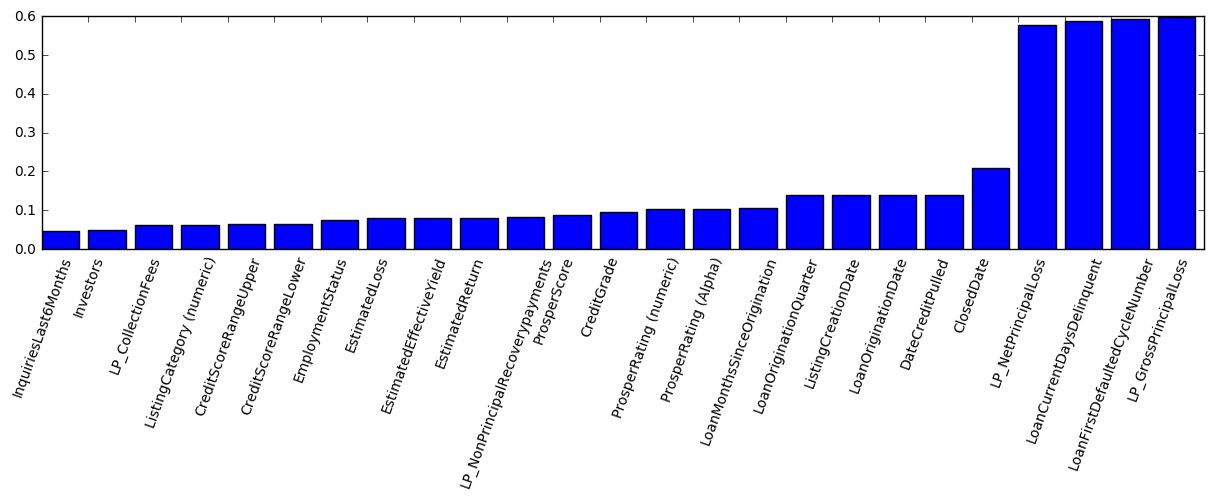

In [137]:
plt.bar(range(len(feature_list[48:])), ig_list[48:])
plt.xticks(range(len(feature_list[48:])), feature_list[48:], rotation=70)
plt.show()

Values with high information gains are target leaks in this case! Let's drop them from our analysis!

In [150]:
features.pop('LP_GrossPrincipalLoss', None)
features.pop('LoanFirstDefaultedCycleNumber', None)
features.pop('LoanCurrentDaysDelinquent', None)
features.pop('LP_NetPrincipalLoss', None)
features.pop('CreditGrade', None)
features.pop('ProsperRating (Alpha)', None)

0.10316811398792514

Modify Code for Dates - They look suspiciously highly informative!

In [139]:
#Since Date seems conspicuously highly indicative of the target, we should try to see if we should take a grouping of date values by Quarter

listingcreationdate = []
for i in data['ListingCreationDate']:
    date = i.split()[0].split('-')
    month = float(date[0])
    listingcreationdate.append(month)
listingcreationdate
X = X.drop(['ListingCreationDate'], axis=1)
dateseries = pd.Series(listingcreationdate)
X['ListingCreationDate'] = dateseries.values

In [140]:
origdate = []
for i in data['LoanOriginationDate']:
    date = i.split()[0].split('-')
    month = float(date[0])
    origdate.append(month)
X = X.drop(['LoanOriginationDate'], axis=1)
dateseries = pd.Series(origdate)
X['LoanOriginationDate'] = dateseries.values

In [141]:
closeddate = []
for i in data['ClosedDate']:
    if i == 'NA':
        closeddate.append(-9999.0)
    else:
        date = i.split()[0].split('-')
        month = float(date[0])
        closeddate.append(month)
closeddate
X = X.drop(['ClosedDate'], axis=1)
dateseries = pd.Series(closeddate)
X['ClosedDate'] = dateseries.values

In [142]:
creditlinedate = []
for i in data['FirstRecordedCreditLine']:
    if i == 'NA':
        creditlinedate.append(-9999.0)
    else:
        date = i.split()[0].split('-')
        month = float(date[0])
        creditlinedate.append(month)
X = X.drop(['FirstRecordedCreditLine'], axis=1)
dateseries = pd.Series(creditlinedate)
X['FirstRecordedCreditLine'] = dateseries.values

In [143]:
creditdate = []
for i in data['DateCreditPulled']:
    date = i.split()[0].split('-')
    month = float(date[0])
    creditdate.append(month)
X = X.drop(['DateCreditPulled'], axis=1)
dateseries = pd.Series(creditdate)
X['DateCreditPulled'] = dateseries.values

In [144]:
origquarter = []
for i in data['LoanOriginationQuarter']:
    quarter = float(i.split()[0][1])
    origquarter.append(quarter)
origquarter
X = X.drop(['LoanOriginationQuarter'], axis=1)
dateseries = pd.Series(creditdate)
X['LoanOriginationQuarter'] = dateseries.values

In [145]:
for i in ['ListingCreationDate', 'LoanOriginationDate', 'ClosedDate', 'FirstRecordedCreditLine', 'DateCreditPulled', 'LoanOriginationQuarter']:
    t = best_threshold(X[i])
    ig = information_gain_continuous(X[i], t, Y)
    features[i] = ig

0.00236364807933 8.0
0.00226886224211 9.0
0.176902534325 -9999.0
0.000944866458095 -9999.0
0.00268132607128 8.0
0.00268132607128 8.0


Note: Closed Date seems to have a high IG, while the column corresponding to the duration for similar dates aren't as informative.

In [146]:
features.pop('ClosedDate', None)

0.17690253432514474

In [152]:
sorted_igs = sorted(features.items(), key=operator.itemgetter(1))

feature_list = []
ig_list = []
for i in sorted_igs:
    feature_list.append(i[0])
    ig_list.append(i[1])

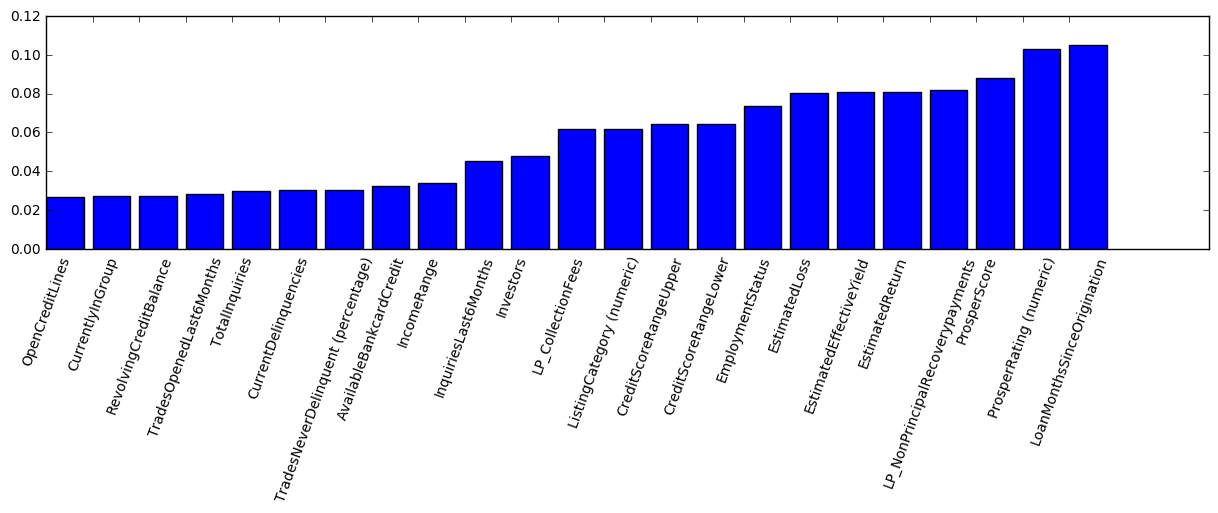

In [153]:
plt.rcParams['figure.figsize'] = [15.0, 3.0]
plt.bar(range(len(feature_list[43:])), ig_list[43:])
plt.xticks(range(len(feature_list[43:])), feature_list[43:], rotation=70)
plt.show()

In [154]:
X_col = feature_list[len(feature_list)-30:len(feature_list)]

In [213]:
print(X_col)

['PublicRecordsLast12Months', 'TotalTrades', 'LenderYield', 'BankcardUtilization', 'OpenRevolvingAccounts', 'BorrowerRate', 'CurrentCreditLines', 'OpenCreditLines', 'CurrentlyInGroup', 'RevolvingCreditBalance', 'TradesOpenedLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'TradesNeverDelinquent (percentage)', 'AvailableBankcardCredit', 'IncomeRange', 'InquiriesLast6Months', 'Investors', 'LP_CollectionFees', 'ListingCategory (numeric)', 'CreditScoreRangeUpper', 'CreditScoreRangeLower', 'EmploymentStatus', 'EstimatedLoss', 'EstimatedEffectiveYield', 'EstimatedReturn', 'LP_NonPrincipalRecoverypayments', 'ProsperScore', 'ProsperRating (numeric)', 'LoanMonthsSinceOrigination']


In [155]:
X_copy = X

In [156]:
X = X[X_col]

In [157]:
X.head()

,PublicRecordsLast12Months,TotalTrades,LenderYield,BankcardUtilization,OpenRevolvingAccounts,BorrowerRate,CurrentCreditLines,OpenCreditLines,CurrentlyInGroup,RevolvingCreditBalance,...,CreditScoreRangeUpper,CreditScoreRangeLower,EmploymentStatus,EstimatedLoss,EstimatedEffectiveYield,EstimatedReturn,LP_NonPrincipalRecoverypayments,ProsperScore,ProsperRating (numeric),LoanMonthsSinceOrigination
0,0.0,11.0,0.1380,0.00,1,0.1580,5.0,4.0,True,0.0,...,659.0,640.0,Self-employed,-9999.0000,-9999.00000,-9999.00000,0.0,-9999.0,-9999.0,78
1,0.0,29.0,0.0820,0.21,13,0.0920,14.0,14.0,False,3989.0,...,699.0,680.0,Employed,0.0249,0.07960,0.05470,0.0,7.0,6.0,0
2,-9999.0,-9999.0,0.2400,-9999.00,0,0.2750,-9999.0,-9999.0,True,-9999.0,...,499.0,480.0,Not available,-9999.0000,-9999.00000,-9999.00000,0.0,-9999.0,-9999.0,86
3,0.0,26.0,0.0874,0.04,7,0.0974,5.0,5.0,False,1444.0,...,819.0,800.0,Employed,0.0249,0.08490,0.06000,0.0,9.0,6.0,16
4,0.0,39.0,0.1985,0.81,6,0.2085,19.0,19.0,False,6193.0,...,699.0,680.0,Employed,0.0925,0.18316,0.09066,0.0,4.0,3.0,6


In [158]:
Y.tail()

113932    0
113933    0
113934    0
113935    0
113936    0
Name: LoanStatus, dtype: int64

In [159]:
# A function to plot the data
def Plot_Data(data, v1, v2, tv):
    # Make the plot square
    plt.rcParams['figure.figsize'] = [12.0, 8.0]
    # Color
    color = ["red" if x == 0 else "blue" for x in data[tv]]
    # Plot and label
    plt.scatter(data[v1], data[v2], c=color, s=50)
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.xlim([min(data[v1]) , max(data[v1]) ])
    plt.ylim([min(data[v2]) , max(data[v2]) ])

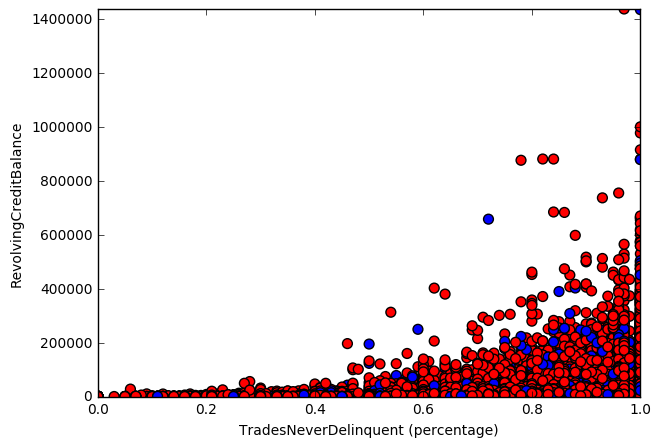

In [161]:
plt.figure(figsize=[7,5])
Plot_Data(orig_data, X_col[13], X_col[9], 'LoanStatus')

## Modeling

**Importing Libraries**

In [162]:
import os
import sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

from IPython.display import Image
from random import randint
from sklearn.model_selection import GridSearchCV

### Decision Tree Classifier

In [163]:
# Let's define the model (tree)
tree_model = DecisionTreeClassifier(max_depth = 10, criterion="entropy")

### RandomForestClassifier

In [164]:
# Let's define the model (forest)
forest_model = RandomForestClassifier(max_depth = 10, criterion="entropy")

In [165]:
print (X.dtypes)

PublicRecordsLast12Months             float64
TotalTrades                           float64
LenderYield                           float64
BankcardUtilization                   float64
OpenRevolvingAccounts                   int64
BorrowerRate                          float64
CurrentCreditLines                    float64
OpenCreditLines                       float64
CurrentlyInGroup                         bool
RevolvingCreditBalance                float64
TradesOpenedLast6Months               float64
TotalInquiries                        float64
CurrentDelinquencies                  float64
TradesNeverDelinquent (percentage)    float64
AvailableBankcardCredit               float64
IncomeRange                            object
InquiriesLast6Months                  float64
Investors                               int64
LP_CollectionFees                     float64
ListingCategory (numeric)               int64
CreditScoreRangeUpper                 float64
CreditScoreRangeLower             

In [166]:
le = preprocessing.LabelEncoder()

In [167]:
for col in ['CurrentlyInGroup', 'IncomeRange', 'EmploymentStatus']:
    le.fit(X[col])
    X[col] = le.transform(X[col])

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [198]:
#list(le.classes_)
#list(le.inverse_transform(X_train['CurrentDelinquencies']))

#### Let's split the data into Training Data and Holdout Data

In [168]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.8)

In [169]:
X_train.head()

,PublicRecordsLast12Months,TotalTrades,LenderYield,BankcardUtilization,OpenRevolvingAccounts,BorrowerRate,CurrentCreditLines,OpenCreditLines,CurrentlyInGroup,RevolvingCreditBalance,...,CreditScoreRangeUpper,CreditScoreRangeLower,EmploymentStatus,EstimatedLoss,EstimatedEffectiveYield,EstimatedReturn,LP_NonPrincipalRecoverypayments,ProsperScore,ProsperRating (numeric),LoanMonthsSinceOrigination
62445,0.0,20.0,0.1369,0.94,5,0.1469,7.0,6.0,0,12493.0,...,719.0,700.0,0,0.0420,0.1346,0.0926,0.0,7.0,5.0,22
87294,0.0,25.0,0.1599,0.74,9,0.1699,11.0,11.0,0,48272.0,...,739.0,720.0,7,0.0549,0.1512,0.0963,0.0,4.0,5.0,10
42055,0.0,19.0,0.2184,0.43,9,0.2284,8.0,7.0,0,7115.0,...,719.0,700.0,0,0.0874,0.2021,0.1147,0.0,4.0,4.0,13
21805,0.0,17.0,0.3099,0.62,6,0.3199,14.0,13.0,0,5520.0,...,699.0,680.0,0,0.1470,0.2957,0.1487,0.0,5.0,2.0,35
15265,0.0,33.0,0.2200,0.70,22,0.2350,25.0,22.0,1,39499.0,...,619.0,600.0,7,-9999.0000,-9999.0000,-9999.0000,0.0,-9999.0,-9999.0,82


In [170]:
# Let's tell the model what is the data
tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [171]:
forest_model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [172]:
tree_train_accuracy = metrics.accuracy_score(tree_model.predict(X_train), Y_train)
tree_test_accuracy = metrics.accuracy_score(tree_model.predict(X_test), Y_test)

print ("train_df and test_df accuracy for decision tree = %.4f and %.4f" % (tree_train_accuracy, tree_test_accuracy))

tree_train_accuracy = metrics.accuracy_score(forest_model.predict(X_train), Y_train)
tree_test_accuracy = metrics.accuracy_score(forest_model.predict(X_test), Y_test)

print ("train_df and test_df accuracy for random forest = %.4f and %.4f" % (tree_train_accuracy, tree_test_accuracy))

train_df and test_df accuracy for decision tree = 0.8943 and 0.8880
train_df and test_df accuracy for random forest = 0.8963 and 0.8932


In [173]:
# A function that gives a visual representation of the decision tree
def Decision_Tree_Image(decision_tree, feature_names, name="temp"):    
    # Export our decision tree to graphviz format
    dot_file = tree.export_graphviz(decision_tree.tree_, out_file='image/' + name + '.dot', feature_names=feature_names)
    # Call graphviz to make an image file from our decision tree
    os.system("dot -T png image/" + name + ".dot -o image/" + name + ".png")
    # Return the .png image so we can see it
    return Image(filename='image/' + name + '.png')

In [178]:
tree_img_model = DecisionTreeClassifier(max_depth = 4, criterion="entropy")
tree_img_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

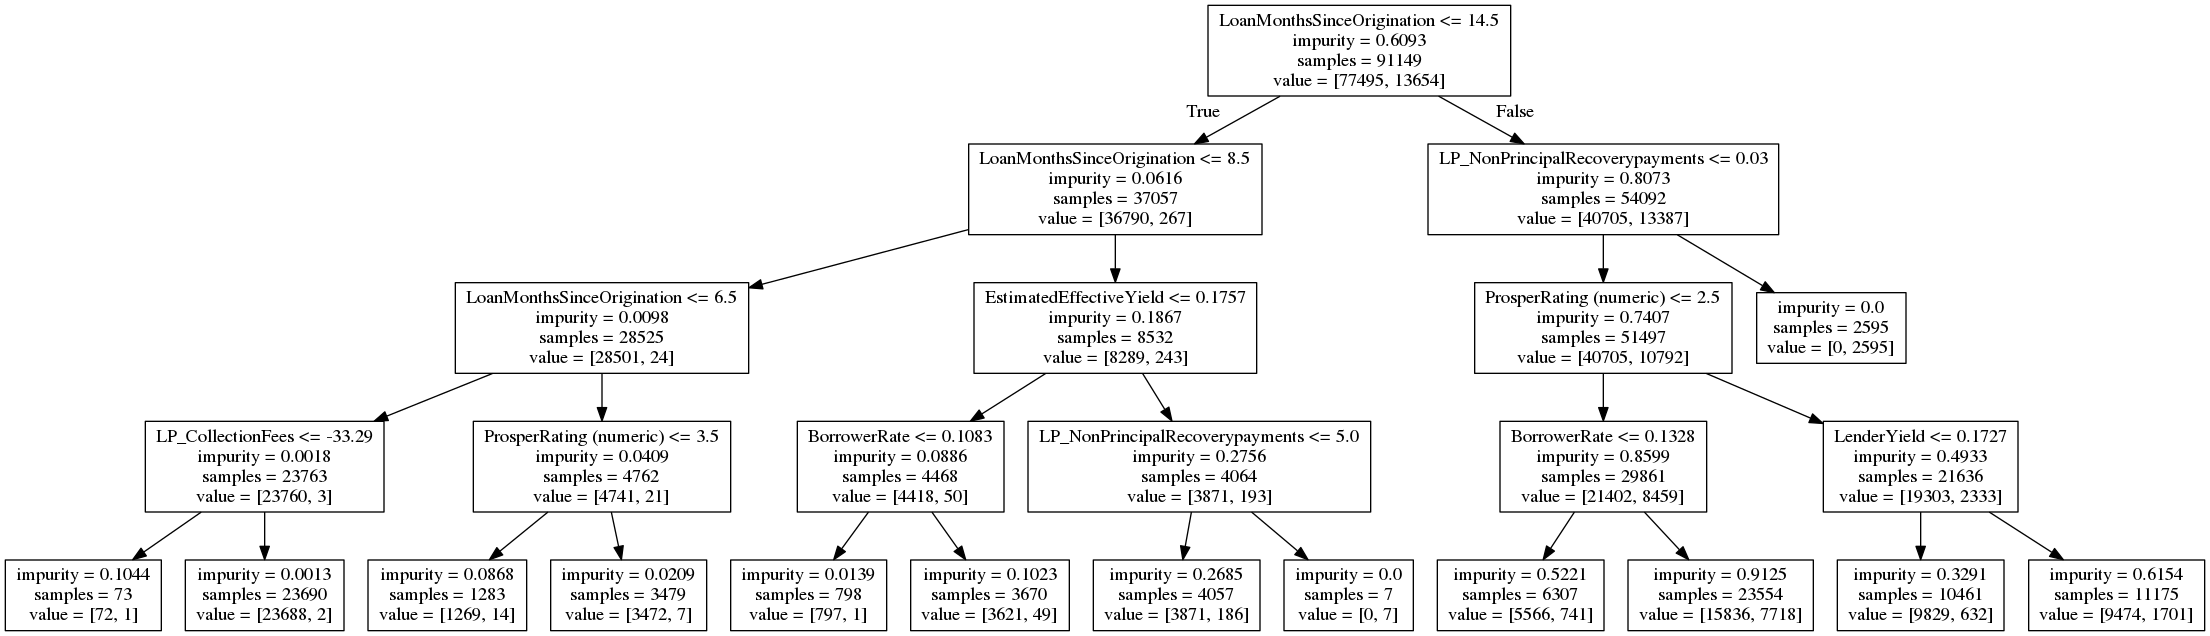

In [179]:
Decision_Tree_Image(tree_img_model, X_train.columns)

In [296]:
#plt.figure(figsize=[10,7])
#Decision_Surface(X_train, Y_train, None, surface=False)

### Naive Bayes

In [180]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [181]:
bnb_model = BernoulliNB()
gnb_model = GaussianNB()

In [182]:
bnb_model.fit(X_train, Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [183]:
gnb_model.fit(X_train, Y_train)

GaussianNB(priors=None)

### Logistic Regression and LinearSVC

In [239]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [240]:
lr_model = LogisticRegression()
svm_model = LinearSVC()

lr_model.fit(X_train, Y_train)
svm_model.fit(X_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

## Evaluation 

**Importing Libraries**

In [184]:
from sklearn.model_selection import cross_val_score

import random
from random import randint

### Generalization

Our evaluation above actually was not what we really want.

We had set aside some data to be used later for testing ('holdout data').  This allows us to assess whether the model simply fit the training dataset well, or whether it truly fit some regularities in the domain. 

In [200]:
tree_model = DecisionTreeClassifier(max_depth = 9)
tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [201]:
forest_model = DecisionTreeClassifier(max_depth = 9)
forest_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [202]:
tree_train_accuracy = metrics.roc_auc_score(tree_model.predict(X_train), Y_train)
tree_test_accuracy = metrics.roc_auc_score(tree_model.predict(X_test), Y_test)

print ("train_df and test_df accuracy for decision tree = %.4f and %.4f" % (tree_train_accuracy, tree_test_accuracy))

tree_train_accuracy = metrics.roc_auc_score(forest_model.predict(X_train), Y_train)
tree_test_accuracy = metrics.roc_auc_score(forest_model.predict(X_test), Y_test)

print ("train_df and test_df accuracy for random forest = %.4f and %.4f" % (tree_train_accuracy, tree_test_accuracy))

tree_train_accuracy = metrics.roc_auc_score(bnb_model.predict(X_train), Y_train)
tree_test_accuracy = metrics.roc_auc_score(bnb_model.predict(X_test), Y_test)

print ("train_df and test_df accuracy for benoulliNB = %.4f and %.4f" % (tree_train_accuracy, tree_test_accuracy))

tree_train_accuracy = metrics.roc_auc_score(gnb_model.predict(X_train), Y_train)
tree_test_accuracy = metrics.roc_auc_score(gnb_model.predict(X_test), Y_test)

print ("train_df and test_df accuracy for gaussianNB = %.4f and %.4f" % (tree_train_accuracy, tree_test_accuracy))

train_df and test_df accuracy for decision tree = 0.8704 and 0.8460
train_df and test_df accuracy for random forest = 0.8704 and 0.8458
train_df and test_df accuracy for benoulliNB forest = 0.6597 and 0.6644
train_df and test_df accuracy for gaussianNB = 0.7219 and 0.7183


In [241]:
tree_train_accuracy = metrics.roc_auc_score(lr_model.predict(X_train), Y_train)
tree_test_accuracy = metrics.roc_auc_score(lr_model.predict(X_test), Y_test)

print ("train_df and test_df accuracy for Logistic Regression = %.4f and %.4f" % (tree_train_accuracy, tree_test_accuracy))

tree_train_accuracy = metrics.roc_auc_score(svm_model.predict(X_train), Y_train)
tree_test_accuracy = metrics.roc_auc_score(svm_model.predict(X_test), Y_test)

print ("train_df and test_df accuracy for SVM = %.4f and %.4f" % (tree_train_accuracy, tree_test_accuracy))

train_df and test_df accuracy for Logistic Regression = 0.9107 and 0.9155
train_df and test_df accuracy for SVM = 0.6127 and 0.6154


In [188]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.8)

In [189]:
accuracies_train = []
accuracies_test = []
accuracies_train_rf = []
accuracies_test_rf = []
depths = range(1, 31)

for md in depths:
    model = DecisionTreeClassifier(max_depth=md)
    model.fit(X_train, Y_train)
    accuracies_train.append(metrics.roc_auc_score(model.predict(X_train), Y_train))
    accuracies_test.append(metrics.roc_auc_score(model.predict(X_test), Y_test))
    model = RandomForestClassifier(max_depth=md)
    model.fit(X_train, Y_train)
    accuracies_train_rf.append(metrics.roc_auc_score(model.predict(X_train), Y_train))
    accuracies_test_rf.append(metrics.roc_auc_score(model.predict(X_test), Y_test))

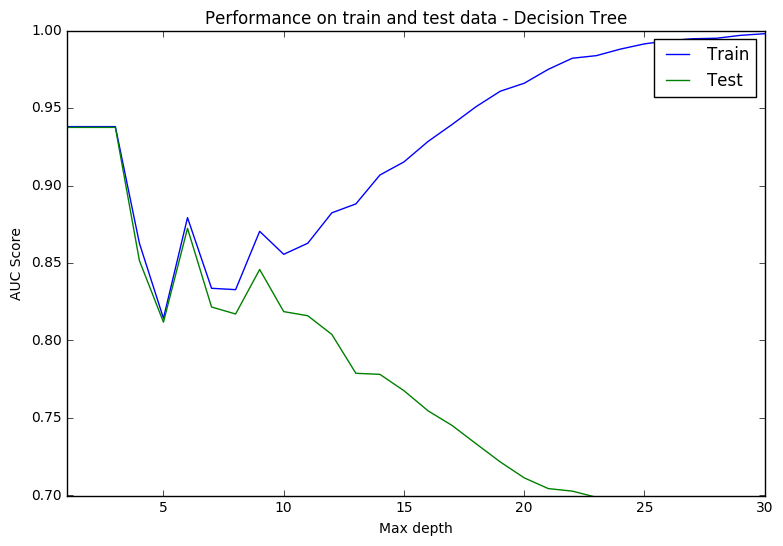

In [190]:
plt.figure(figsize=[9,6])

plt.plot(depths, accuracies_train, label="Train")
plt.plot(depths, accuracies_test, label="Test")
plt.title("Performance on train and test data - Decision Tree")
plt.xlabel("Max depth")
plt.ylabel("AUC Score")
plt.ylim([0.7,1])
plt.xlim([1,30])
plt.legend()
plt.show()

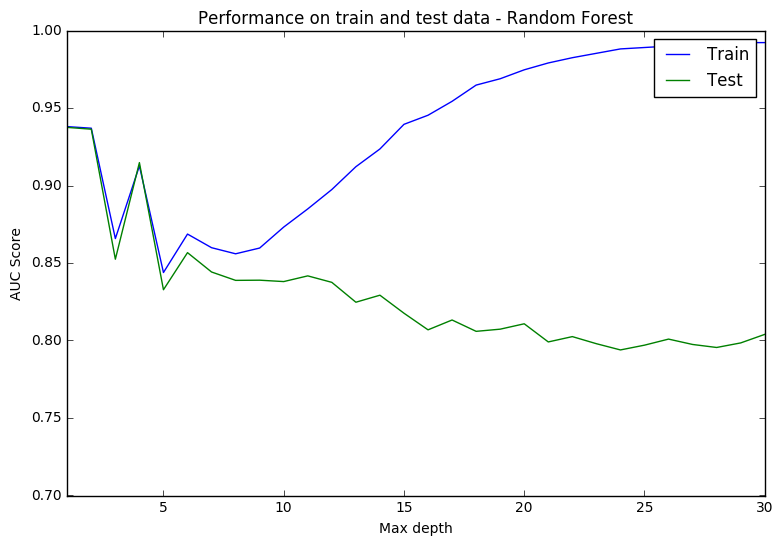

In [191]:
plt.figure(figsize=[9,6])

plt.plot(depths, accuracies_train_rf, label="Train")
plt.plot(depths, accuracies_test_rf, label="Test")
plt.title("Performance on train and test data - Random Forest")
plt.xlabel("Max depth")
plt.ylabel("AUC Score")
plt.ylim([0.7, 1.0])
plt.xlim([1,30])
plt.legend()
plt.show()

We can see that the maximum depth for decision tree is 8, while for random forest it is 7.

In [192]:
n_accuracies_train = []
n_accuracies_test = []
alpha = range(1, 20)

for a in alpha:
    model = BernoulliNB(alpha=a)
    model.fit(X_train, Y_train)
    n_accuracies_train.append(metrics.roc_auc_score(model.predict(X_train), Y_train))
    n_accuracies_test.append(metrics.roc_auc_score(model.predict(X_test), Y_test))

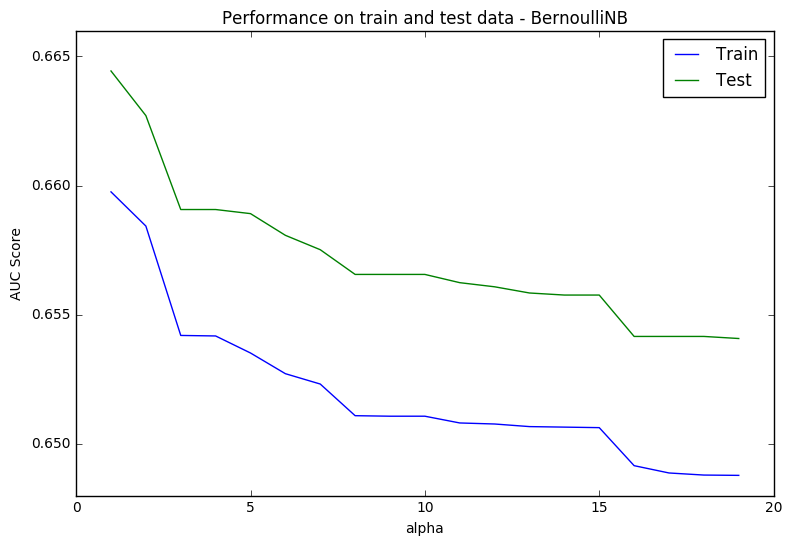

In [193]:
plt.figure(figsize=[9,6])

plt.plot(alpha, n_accuracies_train, label="Train")
plt.plot(alpha, n_accuracies_test, label="Test")
plt.title("Performance on train and test data - BernoulliNB")
plt.xlabel("alpha")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [245]:
lr_accuracies_train = []
lr_accuracies_test = []
svm_accuracies_train = []
svm_accuracies_test = []

c_values = [10**i for i in range(-10, 10)]

for i in c_values:
    model = LogisticRegression(C=i)
    model.fit(X_train, Y_train)
    lr_accuracies_train.append(metrics.roc_auc_score(model.predict(X_train), Y_train))
    lr_accuracies_test.append(metrics.roc_auc_score(model.predict(X_test), Y_test))
    model = LinearSVC(C=i)
    model.fit(X_train, Y_train)
    svm_accuracies_train.append(metrics.roc_auc_score(model.predict(X_train), Y_train))
    svm_accuracies_test.append(metrics.roc_auc_score(model.predict(X_test), Y_test))

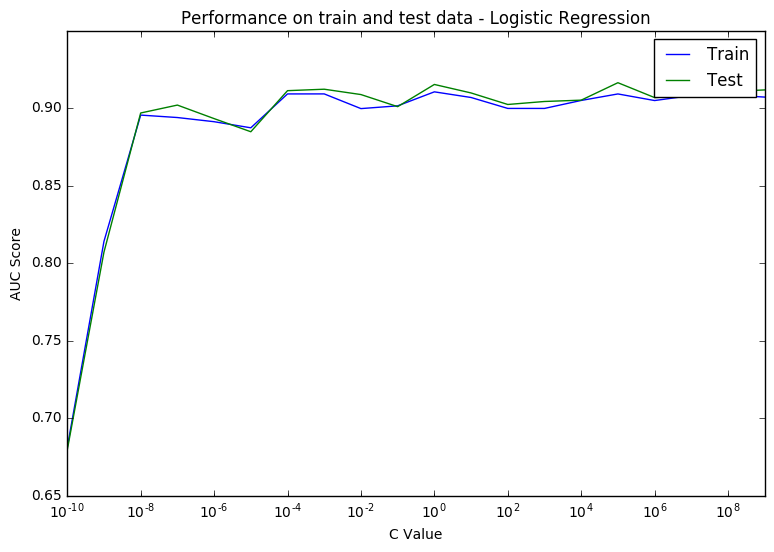

In [250]:
plt.figure(figsize=[9,6])

plt.plot(c_values, lr_accuracies_train, label="Train")
plt.plot(c_values, lr_accuracies_test, label="Test")
plt.title("Performance on train and test data - Logistic Regression")
plt.xlabel("C Value")
plt.ylabel("AUC Score")
#plt.ylim([0.85,0.95])
plt.xscale("log", nonposx='clip', basex=10)
plt.legend()
plt.show()

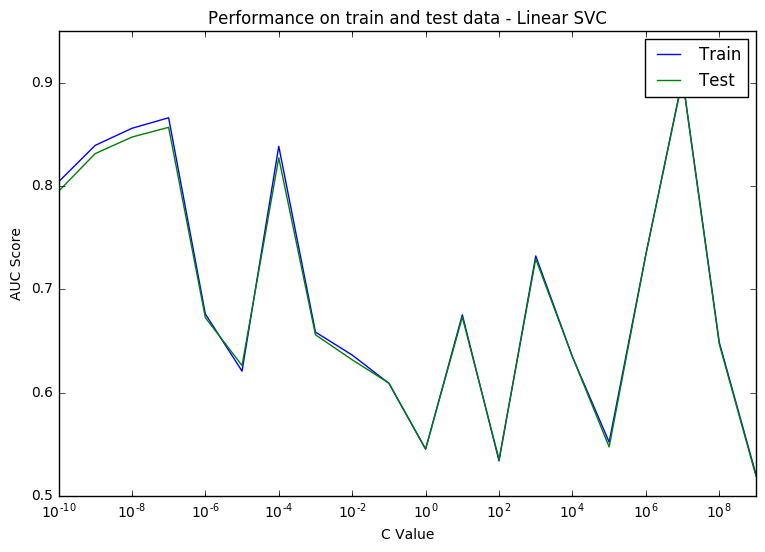

In [251]:
plt.figure(figsize=[9,6])

plt.plot(c_values, svm_accuracies_train, label="Train")
plt.plot(c_values, svm_accuracies_test, label="Test")
plt.title("Performance on train and test data - Linear SVC")
plt.xlabel("C Value")
plt.xscale("log", nonposx='clip', basex=10)
plt.ylabel("AUC Score")
plt.legend()
plt.show()

Optimal Complexities - 
For Logistic Regression = 10^5
For SVM = 10^7

### Cross validation

Instead of only making the split once, let's use "cross-validation" - every record will contribute to testing as well as to training.

In [194]:
# Decision Tree
model = DecisionTreeClassifier(max_depth = 8)
model.fit(X_train, Y_train)

print ("Cross validation accuracy on training for decision tree = %.6f" % np.mean(cross_val_score(model, X, Y)))

# Random Forest
model = RandomForestClassifier(max_depth = 7)
model.fit(X_train, Y_train)

print ("Cross validation accuracy on training for random forest = %.6f" % np.mean(cross_val_score(model, X, Y)))

Cross validation accuracy on training for decision tree = 0.888693
Cross validation accuracy on training for random forest = 0.889474


In [666]:
accuracies_cross_validation = []
accuracies_cross_validation_rf = []
depths = range(1, 31)

for md in depths:
    model = DecisionTreeClassifier(max_depth = md)
    model.fit(X_train, Y_train)
    accuracies_cross_validation.append(np.mean(cross_val_score(model, X, Y)))
    model = RandomForestClassifier(max_depth = md)
    model.fit(X_train, Y_train)
    accuracies_cross_validation_rf.append(np.mean(cross_val_score(model, X, Y)))

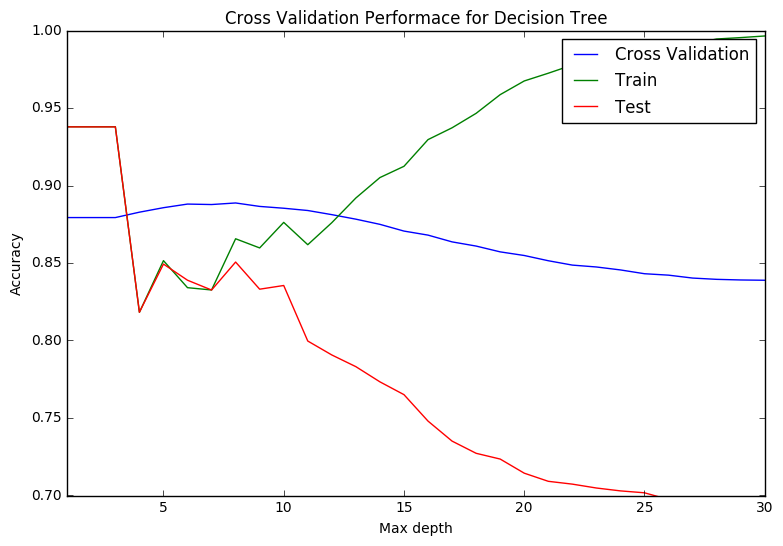

In [696]:
plt.figure(figsize=[9,6])

plt.plot(depths, accuracies_cross_validation, label="Cross Validation")
plt.plot(depths, accuracies_train, label="Train")
plt.plot(depths, accuracies_test, label="Test")
plt.title("Cross Validation Performace for Decision Tree")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.ylim([0.7, 1.0])
plt.xlim([1,30])
plt.legend()
plt.show()

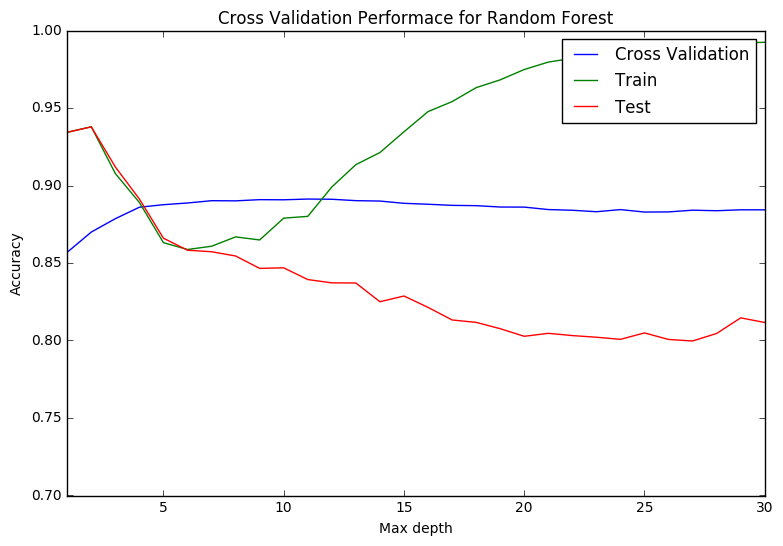

In [697]:
plt.figure(figsize=[9,6])

plt.plot(depths, accuracies_cross_validation_rf, label="Cross Validation")
plt.plot(depths, accuracies_train_rf, label="Train")
plt.plot(depths, accuracies_test_rf, label="Test")
plt.title("Cross Validation Performace for Random Forest")
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.ylim([0.7, 1.0])
plt.xlim([1,30])
plt.legend()
plt.show()

Finding the optimal k for k-fold cross validation! 

In [681]:
cv_folds = [2,3,4,5,6,7,8,9,10,15,20,25]
cv_acc_mean_dt = []
cv_acc_std_dt = []
cv_acc_mean_rf = []
cv_acc_std_rf = []
cv_acc_mean_nb = []
cv_acc_std_nb = []

dt_model = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
rf_model = RandomForestClassifier(criterion="entropy", max_depth = 7)
nb_model = BernoulliNB()

dt_model.fit(X, Y)
rf_model.fit(X, Y)
nb_model.fit(X, Y)

for i in cv_folds:
    acc_dt = np.mean(cross_val_score(dt_model, X, Y, cv=i))
    acc_rf = np.mean(cross_val_score(rf_model, X, Y, cv=i))
    acc_nb = np.mean(cross_val_score(nb_model, X, Y, cv=i))
    cv_acc_mean_dt.append(acc_dt)
    cv_acc_mean_rf.append(acc_rf)
    cv_acc_mean_nb.append(acc_nb)
    cv_acc_std_dt.append(np.std(cross_val_score(dt_model, X, Y, cv=i)))
    cv_acc_std_rf.append(np.std(cross_val_score(rf_model, X, Y, cv=i)))
    cv_acc_std_nb.append(np.std(cross_val_score(nb_model, X, Y, cv=i)))
    print ('Fold:', i)
    print ('Decision Tree:', acc_dt)
    print ('Random Forest:', acc_rf)
    print ('BernoulliNB:', acc_nb)

Fold: 2
Decision Tree: 0.886375804318
Random Forest: 0.88966709387
BernoulliNB: 0.789462590956
Fold: 3
Decision Tree: 0.886761982499
Random Forest: 0.890044498275
BernoulliNB: 0.789427490631
Fold: 4
Decision Tree: 0.886779533807
Random Forest: 0.88885963756
BernoulliNB: 0.789550345808
Fold: 5
Decision Tree: 0.88745534415
Random Forest: 0.889386245798
BernoulliNB: 0.789892643859
Fold: 6
Decision Tree: 0.887472906466
Random Forest: 0.888982513115
BernoulliNB: 0.789883859481
Fold: 7
Decision Tree: 0.887358797454
Random Forest: 0.88937745273
BernoulliNB: 0.789997993196
Fold: 8
Decision Tree: 0.887165703093
Random Forest: 0.889386198665
BernoulliNB: 0.790006687032
Fold: 9
Decision Tree: 0.887350012978
Random Forest: 0.889043923692
BernoulliNB: 0.790006771927
Fold: 10
Decision Tree: 0.887086712782
Random Forest: 0.889342362155
BernoulliNB: 0.79001556576
Fold: 15
Decision Tree: 0.887016486392
Random Forest: 0.8895441903
BernoulliNB: 0.790006698835
Fold: 20
Decision Tree: 0.887174490223
Random

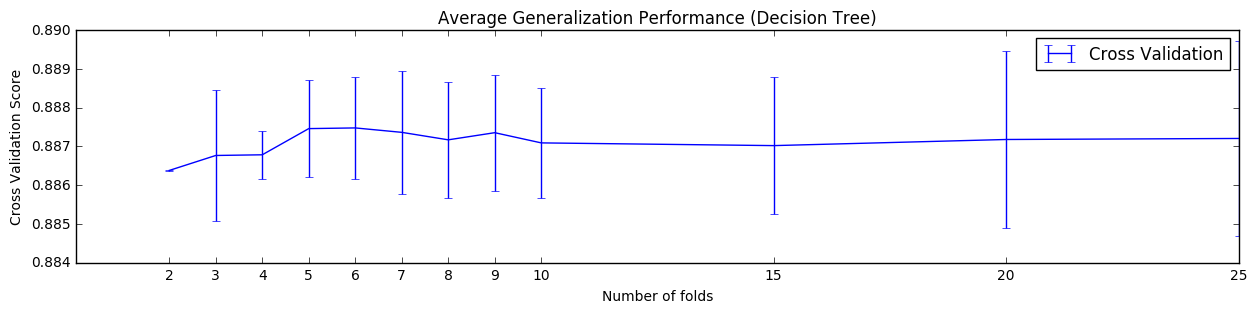

In [687]:
plt.errorbar(cv_folds, cv_acc_mean_dt, yerr=cv_acc_std_dt, label="Cross Validation")
plt.title("Average Generalization Performance (Decision Tree)")
plt.xlabel("Number of folds")
plt.xticks(cv_folds)
plt.ylabel("Cross Validation Score")
plt.legend()
plt.show()

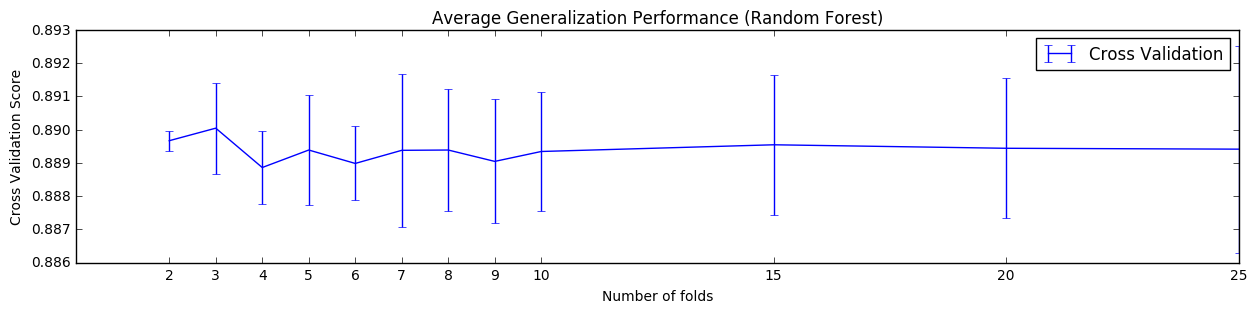

In [688]:
plt.errorbar(cv_folds, cv_acc_mean_rf, yerr=cv_acc_std_rf, label="Cross Validation")
plt.title("Average Generalization Performance (Random Forest)")
plt.xlabel("Number of folds")
plt.xticks(cv_folds)
plt.ylabel("Cross Validation Score")
plt.legend()
plt.show()

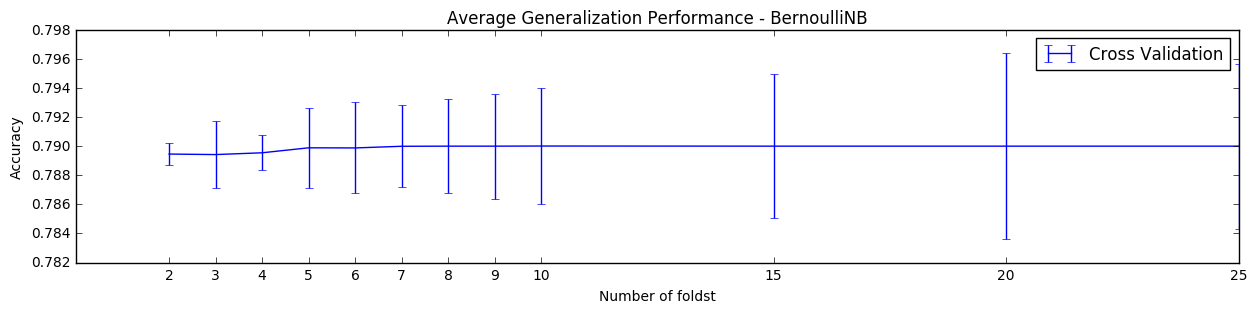

In [689]:
plt.errorbar(cv_folds, cv_acc_mean_nb, yerr=cv_acc_std_nb, label="Cross Validation")
plt.title("Average Generalization Performance - BernoulliNB")
plt.xlabel("Number of foldst")
plt.xticks(cv_folds)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The tradeoff between mean and std is maximum when there are 5-folds for Decision Tree.

The tradeoff between mean and std is maximum when there are 3-folds for Random Forest.

The tradeoff between mean and std is maximum when there are 4-folds for Naive Bayes.

#### AUC for Cross Validation

In [706]:
folds = [2,3,4,5,6,7,8,9,10,15]
auc_acc_mean_dt = []
auc_acc_std_dt = []
auc_acc_mean_rf = []
auc_acc_std_rf = []
auc_acc_mean_nb = []
auc_acc_std_nb = []

dt_model = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
rf_model = RandomForestClassifier(criterion="entropy", max_depth = 7)
nb_model = BernoulliNB()

dt_model.fit(X, Y)
rf_model.fit(X, Y)
nb_model.fit(X, Y)

for i in folds:
    acc_dt = np.mean(cross_val_score(dt_model, X, Y, scoring="roc_auc", cv=i))
    acc_rf = np.mean(cross_val_score(rf_model, X, Y, scoring="roc_auc", cv=i))
    acc_nb = np.mean(cross_val_score(nb_model, X, Y, scoring="roc_auc", cv=i))
    auc_acc_mean_dt.append(acc_dt)
    auc_acc_mean_rf.append(acc_rf)
    auc_acc_mean_nb.append(acc_nb)
    auc_acc_std_dt.append(np.std(cross_val_score(dt_model, X, Y, scoring="roc_auc", cv=i)))
    auc_acc_std_rf.append(np.std(cross_val_score(rf_model, X, Y, scoring="roc_auc", cv=i)))
    auc_acc_std_nb.append(np.std(cross_val_score(nb_model, X, Y, scoring="roc_auc", cv=i)))
    print ('Fold:', i)
    print ('Decision Tree:', acc_dt)
    print ('Random Forest:', acc_rf)
    print ('BernoulliNB:', acc_nb)

Fold: 2
Decision Tree: 0.880104078715
Random Forest: 0.888468396096
BernoulliNB: 0.800651098143
Fold: 3
Decision Tree: 0.881661140862
Random Forest: 0.889061086155
BernoulliNB: 0.800958950925
Fold: 4
Decision Tree: 0.88223443227
Random Forest: 0.889624750632
BernoulliNB: 0.801039299563
Fold: 5
Decision Tree: 0.88317494025
Random Forest: 0.889605788292
BernoulliNB: 0.801132035795
Fold: 6
Decision Tree: 0.882664798245
Random Forest: 0.88976031821
BernoulliNB: 0.801248341074
Fold: 7
Decision Tree: 0.882967932594
Random Forest: 0.889855597895
BernoulliNB: 0.801334459696
Fold: 8
Decision Tree: 0.883305030163
Random Forest: 0.889484329106
BernoulliNB: 0.801360839882
Fold: 9
Decision Tree: 0.883276541414
Random Forest: 0.889640303697
BernoulliNB: 0.801387205093
Fold: 10
Decision Tree: 0.883477918863
Random Forest: 0.889182439418
BernoulliNB: 0.801401170808
Fold: 15
Decision Tree: 0.883342921458
Random Forest: 0.889574505503
BernoulliNB: 0.801442259369


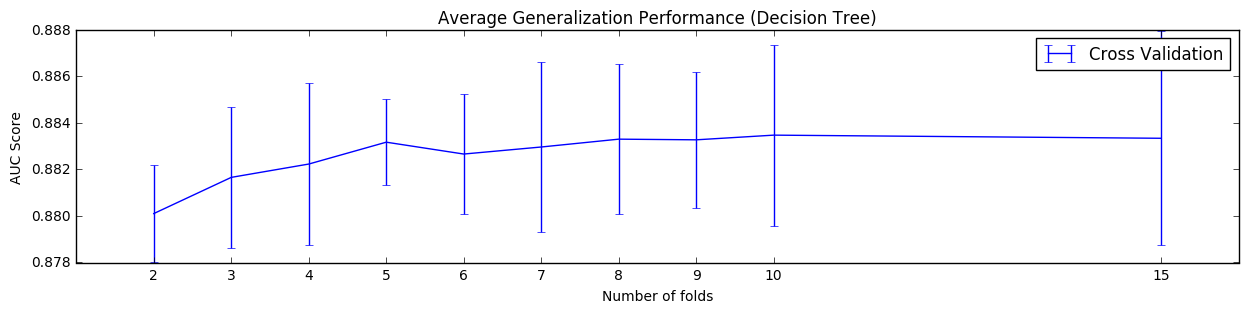

In [713]:
plt.errorbar(folds, auc_acc_mean_dt, yerr=auc_acc_std_dt, label="AUC")
plt.title("Average Generalization Performance (Decision Tree)")
plt.xlabel("Number of folds")
plt.xticks(folds)
plt.xlim([1,16])
plt.ylabel("AUC Score")
plt.legend()
plt.show()

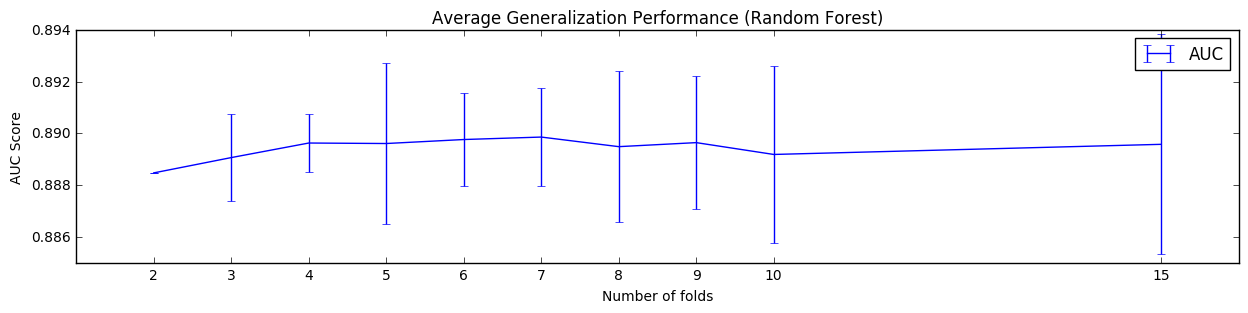

In [714]:
plt.errorbar(folds, auc_acc_mean_rf, yerr=auc_acc_std_rf, label="AUC")
plt.title("Average Generalization Performance (Random Forest)")
plt.xlabel("Number of folds")
plt.xticks(folds)
plt.xlim([1,16])
plt.ylabel("AUC Score")
plt.legend()
plt.show()

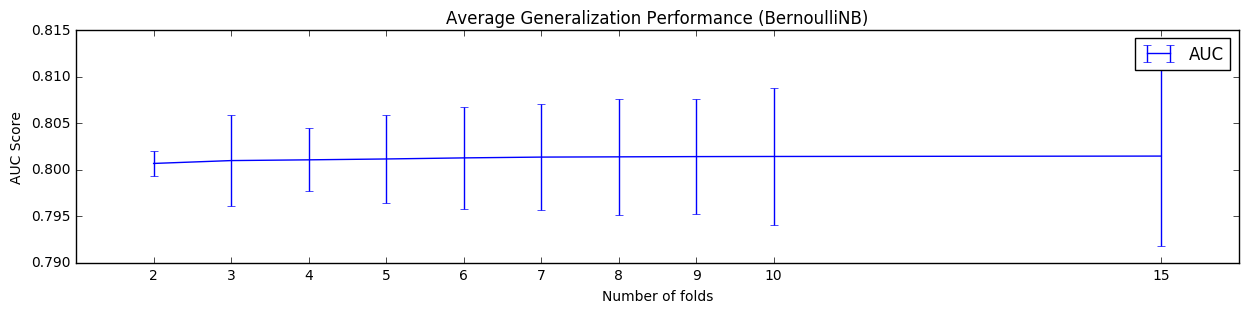

In [715]:
plt.errorbar(folds, auc_acc_mean_nb, yerr=auc_acc_std_nb, label="AUC")
plt.title("Average Generalization Performance (BernoulliNB)")
plt.xlabel("Number of folds")
plt.xticks(folds)
plt.xlim([1,16])
plt.ylabel("AUC Score")
plt.legend()
plt.show()

The tradeoff between mean and std is maximum when there are 5-folds for Decision Tree.

The tradeoff between mean and std is maximum when there are 4-folds for Random Forest.

The tradeoff between mean and std is maximum when there are 4-folds for Naive Bayes.

In [253]:
folds = [2,3,4,5,6,7,8,9,10]

lr_acc_mean = []
lr_acc_std = []

lr_model = LogisticRegression(C=10**5)

lr_model.fit(X, Y)

for i in folds:
    lr_acc = np.mean(cross_val_score(lr_model, X, Y, scoring="roc_auc", cv=i))
    lr_acc_mean.append(lr_acc)
    lr_acc_std.append(np.std(cross_val_score(lr_model, X, Y, scoring="roc_auc", cv=i)))
    print ('Fold:', i)
    print ('Logistic Regression:', lr_acc)

Fold: 2
Logistic Regression: 0.85295004983
Fold: 3
Logistic Regression: 0.852993787448
Fold: 4
Logistic Regression: 0.853667328402
Fold: 5
Logistic Regression: 0.853388067316
Fold: 6
Logistic Regression: 0.85216291644
Fold: 7
Logistic Regression: 0.852816211934
Fold: 8
Logistic Regression: 0.853309497398
Fold: 9
Logistic Regression: 0.852994416163
Fold: 10
Logistic Regression: 0.852809435474


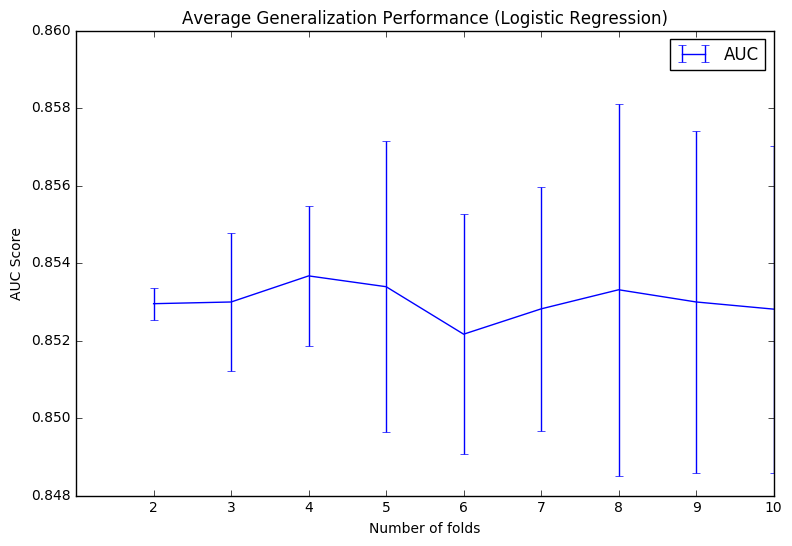

In [256]:
plt.figure(figsize=[9,6])

plt.errorbar(folds, lr_acc_mean, yerr=lr_acc_std, label="AUC")
plt.title("Average Generalization Performance (Logistic Regression)")
plt.xlabel("Number of folds")
plt.xticks(folds)
plt.xlim([1,10])
plt.ylabel("AUC Score")
plt.legend()
plt.show()

4-Fold Cross Validation for Logistic Regression

### Learning curves for model assessment

The options we chose for the tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier. 

For the following options max_depth, min_samples_split, and min_samples_leaf:

In [195]:
min_samples_split_values = []
min_samples_leaf_values = []

for i in range (0,10):
    min_samples_split_values.append(2**(randint(1,20)))
    min_samples_leaf_values.append(2**(randint(1,20)))

max_depth_values = random.sample(range(1, 30), 10)

min_samples_split_values.sort()
min_samples_leaf_values.sort()
max_depth_values.sort()

In [196]:
print (min_samples_split_values)
print (min_samples_leaf_values)
print (max_depth_values)

[2, 32, 128, 256, 1024, 2048, 4096, 131072, 262144, 1048576]
[4, 16, 64, 64, 512, 1024, 8192, 32768, 1048576, 1048576]
[3, 4, 7, 11, 13, 14, 19, 21, 26, 27]


For the values of max_depth, min_samples_split, and min_samples_leaf, we build a new decision tree classifier and record the classifier's accuracy on both, the train and test.

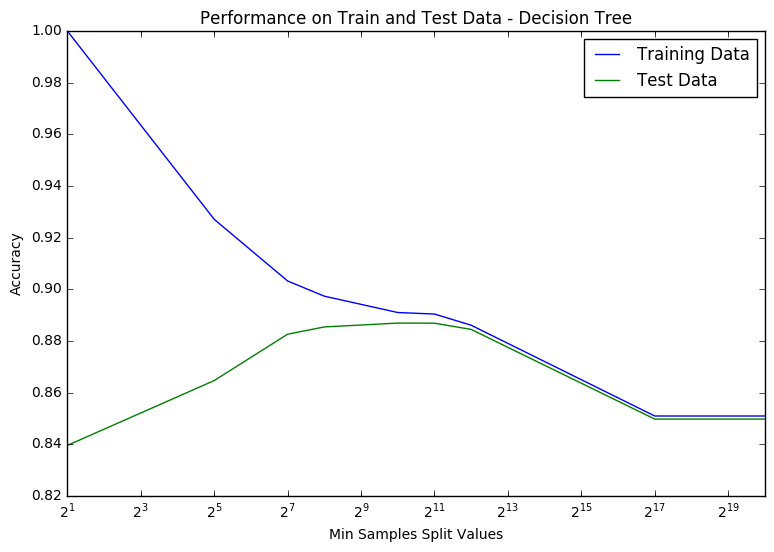

In [197]:
# MIN SAMPLES SPLIT GRAPH - DECISION TREE

accuracies_train = []
accuracies_test = []

for sample_split in min_samples_split_values:
    # Create the Model and Fit it
    tree_model = DecisionTreeClassifier(min_samples_split = sample_split)
    tree_model.fit(X_train, Y_train)
    # Train Accuracy
    train_data_accuracy = metrics.accuracy_score(tree_model.predict(X_train), Y_train)
    accuracies_train.append(train_data_accuracy)
    # Test Accuracy
    test_data_accuracy = metrics.accuracy_score(tree_model.predict(X_test), Y_test)
    accuracies_test.append(test_data_accuracy)
    
plt.figure(figsize=[9,6])

plt.plot(min_samples_split_values, accuracies_train, label="Training Data")
plt.plot(min_samples_split_values, accuracies_test, label="Test Data")
plt.title("Performance on Train and Test Data - Decision Tree")
plt.xlabel("Min Samples Split Values")
plt.ylabel("Accuracy")
plt.xscale("log", nonposx='clip', basex=2)
plt.legend()
plt.show()

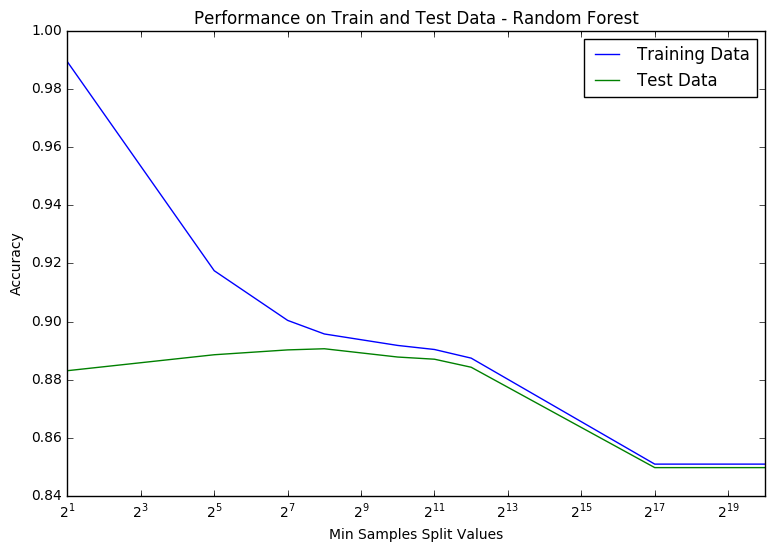

In [198]:
# MIN SAMPLES SPLIT GRAPH - RANDOM FOREST

accuracies_train = []
accuracies_test = []

for sample_split in min_samples_split_values:
    # Create the Model and Fit it
    tree_model = RandomForestClassifier(min_samples_split = sample_split)
    tree_model.fit(X_train, Y_train)
    # Train Accuracy
    train_data_accuracy = metrics.accuracy_score(tree_model.predict(X_train), Y_train)
    accuracies_train.append(train_data_accuracy)
    # Test Accuracy
    test_data_accuracy = metrics.accuracy_score(tree_model.predict(X_test), Y_test)
    accuracies_test.append(test_data_accuracy)
    
plt.figure(figsize=[9,6])

plt.plot(min_samples_split_values, accuracies_train, label="Training Data")
plt.plot(min_samples_split_values, accuracies_test, label="Test Data")
plt.title("Performance on Train and Test Data - Random Forest")
plt.xlabel("Min Samples Split Values")
plt.ylabel("Accuracy")
plt.xscale("log", nonposx='clip', basex=2)
plt.legend()
plt.show()

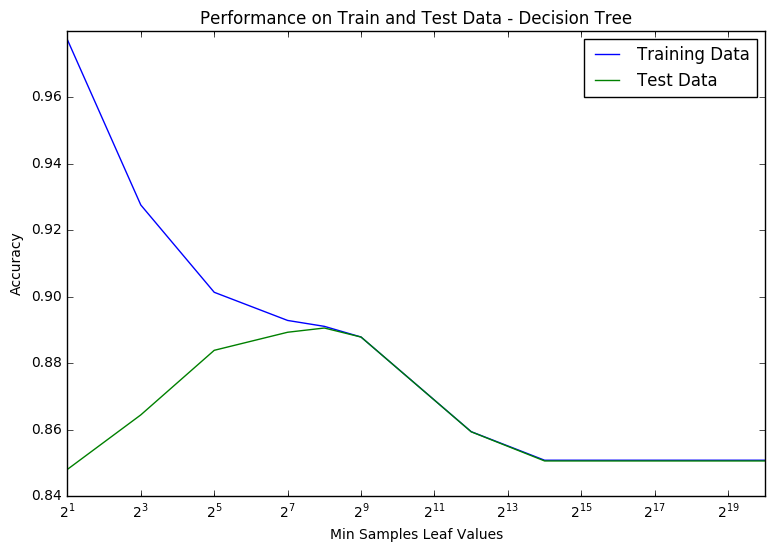

In [702]:
# MIN SAMPLES LEAF GRAPH - DECISION TREE

accuracies_train = []
accuracies_test = []

for sample_leaf in min_samples_leaf_values:
    # Create the Model and Fit it
    tree_model = DecisionTreeClassifier(min_samples_leaf=sample_leaf)
    tree_model.fit(X_train, Y_train)
    # Train Accuracy
    train_data_accuracy = metrics.accuracy_score(tree_model.predict(X_train), Y_train)
    accuracies_train.append(train_data_accuracy)
    # Test Accuracy
    test_data_accuracy = metrics.accuracy_score(tree_model.predict(X_test), Y_test)
    accuracies_test.append(test_data_accuracy)
    
plt.figure(figsize=[9,6])

plt.plot(min_samples_leaf_values, accuracies_train, label="Training Data")
plt.plot(min_samples_leaf_values, accuracies_test, label="Test Data")
plt.title("Performance on Train and Test Data - Decision Tree")
plt.xlabel("Min Samples Leaf Values")
plt.ylabel("Accuracy")
plt.xscale("log", nonposx='clip', basex=2)
plt.legend()
plt.show()

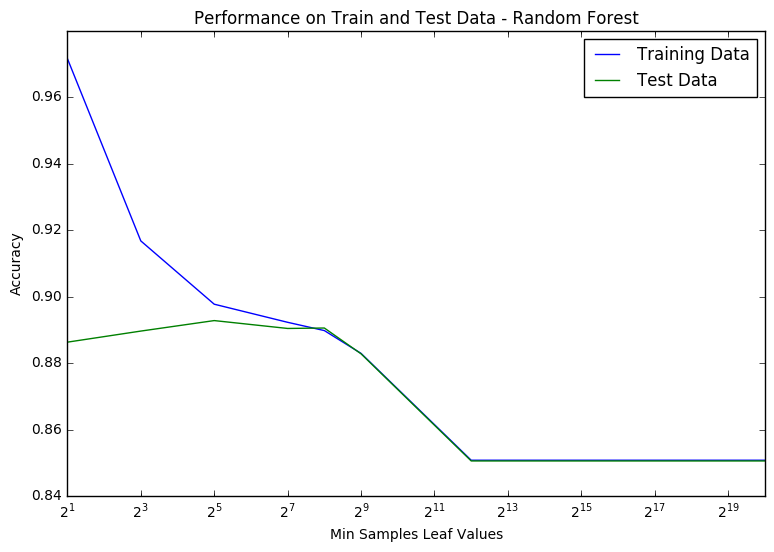

In [704]:
# MIN SAMPLES LEAF GRAPH - RANDOM FOREST

accuracies_train = []
accuracies_test = []

for sample_leaf in min_samples_leaf_values:
    # Create the Model and Fit it
    tree_model = RandomForestClassifier(min_samples_leaf=sample_leaf)
    tree_model.fit(X_train, Y_train)
    # Train Accuracy
    train_data_accuracy = metrics.accuracy_score(tree_model.predict(X_train), Y_train)
    accuracies_train.append(train_data_accuracy)
    # Test Accuracy
    test_data_accuracy = metrics.accuracy_score(tree_model.predict(X_test), Y_test)
    accuracies_test.append(test_data_accuracy)
    
plt.figure(figsize=[9,6])

plt.plot(min_samples_leaf_values, accuracies_train, label="Training Data")
plt.plot(min_samples_leaf_values, accuracies_test, label="Test Data")
plt.title("Performance on Train and Test Data - Random Forest")
plt.xlabel("Min Samples Leaf Values")
plt.ylabel("Accuracy")
plt.xscale("log", nonposx='clip', basex=2)
plt.legend()
plt.show()

For decision tree, best complexities:

_Min Samples split_ - 2^11 and _Min Samples Leaf_ - 2^8

For random forest, best complexities:

_Min Samples split_ - 2^6 and _Min Samples Leaf_ - 2^5

### Confusion matrices

We now build confusion matrices using the above models. Since our models are scoring models, the confusion matrices are defined with respect a scoring model plus a threshold on the score. 

In [205]:
# Split our data
X_dt_train, X_dt_test, Y_dt_train, Y_dt_test = train_test_split(X, Y, train_size=.8)

# Make and fit a model on the training data
model_dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=2**8, min_samples_split=2**11)
model_dt.fit(X_dt_train, Y_dt_train)

# Get probabilities 
probabilities_dt = model_dt.predict_proba(X_dt_test)[:, 1]

In [216]:
X_rf_train, X_rf_test, Y_rf_train, Y_rf_test = train_test_split(X, Y, train_size=.75)

model_rf = RandomForestClassifier(max_depth=7, min_samples_leaf=2**5, min_samples_split=2**6)
model_rf.fit(X_rf_train, Y_rf_train)

model_nb = BernoulliNB()
model_nb.fit(X_rf_train, Y_rf_train)

probabilities_rf = model_rf.predict_proba(X_rf_test)[:, 1]
probabilities_nb = model_nb.predict_proba(X_rf_test)[:, 1]

In [212]:
# For DECISION TREE

prediction_dt = probabilities_dt > 0.5

# Build and print a confusion matrix
confusion_matrix_large = pd.DataFrame(metrics.confusion_matrix(Y_dt_test, prediction_dt, labels=[1, 0]).T,
                                columns=['p', 'n'], index=['Y', 'N'])
print (confusion_matrix_large)

      p      n
Y  1354    451
N  2138  18845


An alternative way is to visualize and measure the performance of a model using the Reciever Operating Characteristic (ROC) curve.

### ROC Curves

- For Decision Tree and Logistic Regression

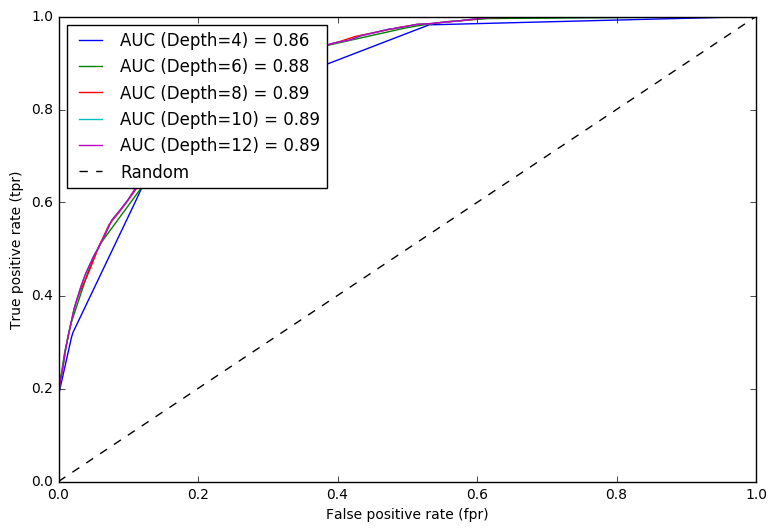

In [228]:
#Split train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.8)

max_depth = [4,6,8,10,12]
plt.figure(figsize=[9,6])

# Fit a decision tree model
for d in max_depth:
    model = DecisionTreeClassifier(max_depth=d, min_samples_leaf=2**8, min_samples_split=2**11)
    model.fit(X_train, Y_train)

    # Get the probability of Y_test records being = 1
    Y_test_probability_1 = model.predict_proba(X_test)[:, 1]

    # Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_test_probability_1)
    
    # Get the area under the curve (AUC)
    auc = np.mean(cross_val_score(model, X, Y, scoring="roc_auc"))

    # Plot the ROC curve
    plt.plot(fpr, tpr, label="AUC (Depth=" + str(d) + ") = " + str(round(auc, 2)))

plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend(loc=2)

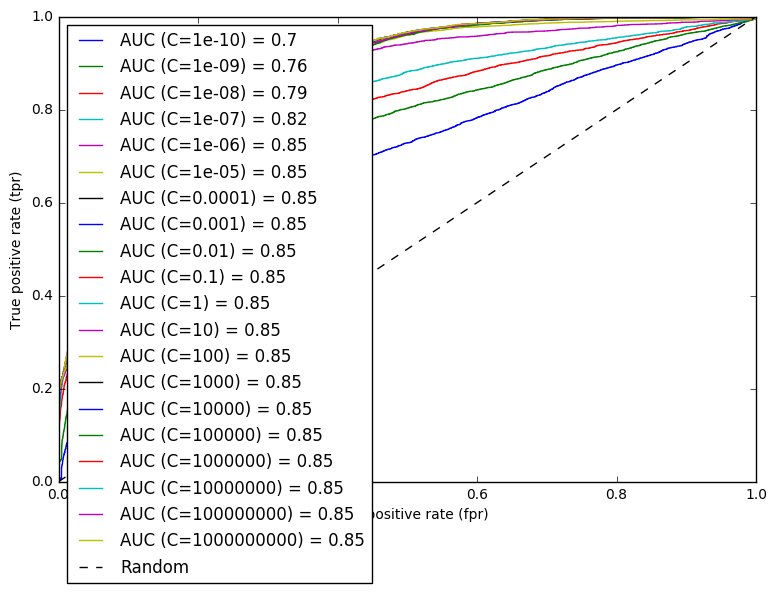

In [257]:
#Split train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

max_depth = []
plt.figure(figsize=[9,6])

# Fit a decision tree model
for c in c_values:
    model = LogisticRegression(C = c)
    model.fit(X_train, Y_train)

    # Get the probability of Y_test records being = 1
    Y_test_probability_1 = model.predict_proba(X_test)[:, 1]

    # Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_test_probability_1)
    
    # Get the area under the curve (AUC)
    auc = np.mean(cross_val_score(model, X, Y, scoring="roc_auc"))

    # Plot the ROC curve
    plt.plot(fpr, tpr, label="AUC (C=" + str(c) + ") = " + str(round(auc, 2)))

plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend(loc=2)

### Cummulative Response Curve

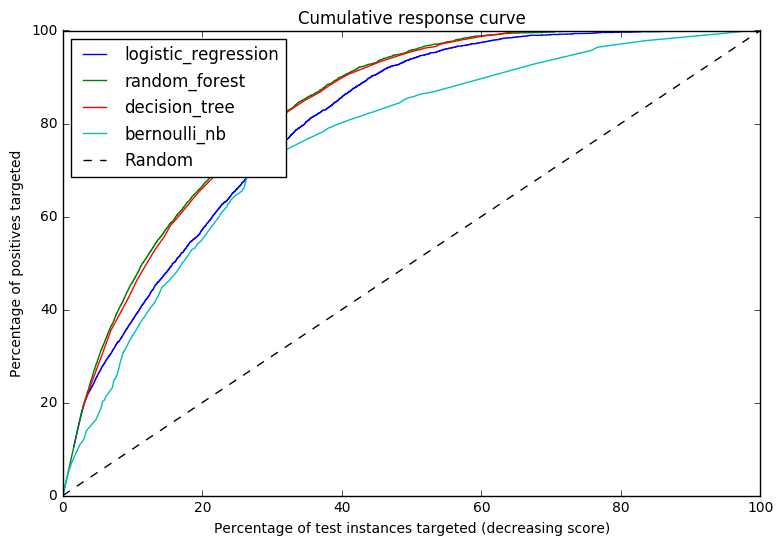

In [261]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.8)

plt.figure(figsize=[9,6])

xs = {}
ys = {}
model_types = ["logistic_regression", "random_forest", "decision_tree", "bernoulli_nb"]

for model_type in model_types:
    # Instantiate the model
    if model_type == "decision_tree":
        model = DecisionTreeClassifier(max_depth=8, min_samples_leaf=2**8, min_samples_split=2**11)
    elif model_type == "random_forest":
        model = RandomForestClassifier(max_depth=7, min_samples_leaf=2**5, min_samples_split=2**6)
    elif model_type == "bernoulli_nb":
        model = BernoulliNB()
    elif model_type == "logistic_regression":
        model = LogisticRegression(C=10**5)
    model.fit(X_train, Y_train)

    Y_test_predicted = model.predict(X_test)
    Y_test_probability_1 = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_test_probability_1)
    # How many users are above the current threshold?
    n_targeted = []
    for t in thresholds:
        n_targeted.append(np.sum(Y_test_probability_1 >= t))

    # Turn these counts to percentages of users above the threshold
    n_targeted = np.array(n_targeted)/float(len(Y_test))

    # Store
    xs[model_type] = n_targeted * 100
    ys[model_type] = tpr * 100
    
    plt.plot(n_targeted * 100, tpr * 100, label=model_type)# * np.sum(Y_test)/float(len(Y_test)))

plt.plot([0,100], [0,100], 'k--', label="Random")
plt.xlabel("Percentage of test instances targeted (decreasing score)")
plt.ylabel("Percentage of positives targeted")
plt.title("Cumulative response curve")
plt.legend(loc=2)
plt.show()

### Lift Curve

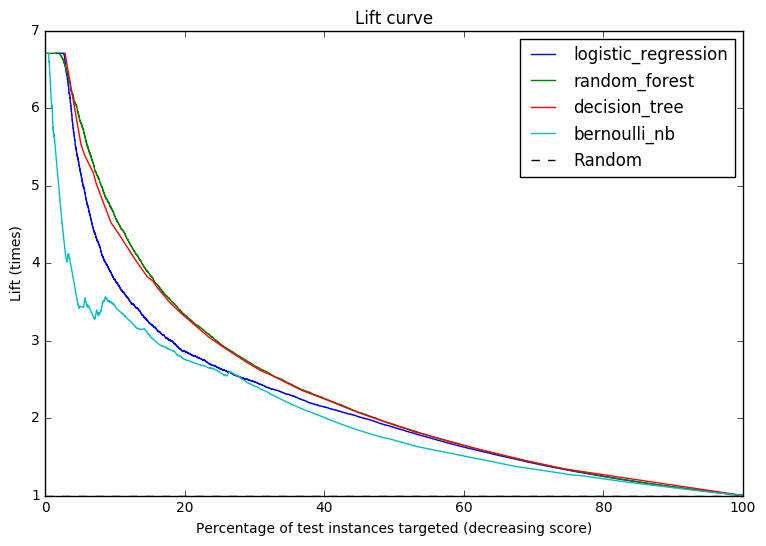

In [262]:
plt.figure(figsize=[9,6])

for model_type in model_types:    
    # Previously computed: n_targeted * 100
    x_lift = xs[model_type]
    # Previously computed: tpr * 100
    y_lift = ys[model_type]/x_lift
    plt.plot(x_lift, y_lift, label=model_type)

plt.plot([0,100], [1,1], 'k--', label="Random")
plt.xlabel("Percentage of test instances targeted (decreasing score)")
plt.ylabel("Lift (times)")
plt.title("Lift curve")
plt.legend()
plt.show()